In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### All Datasets

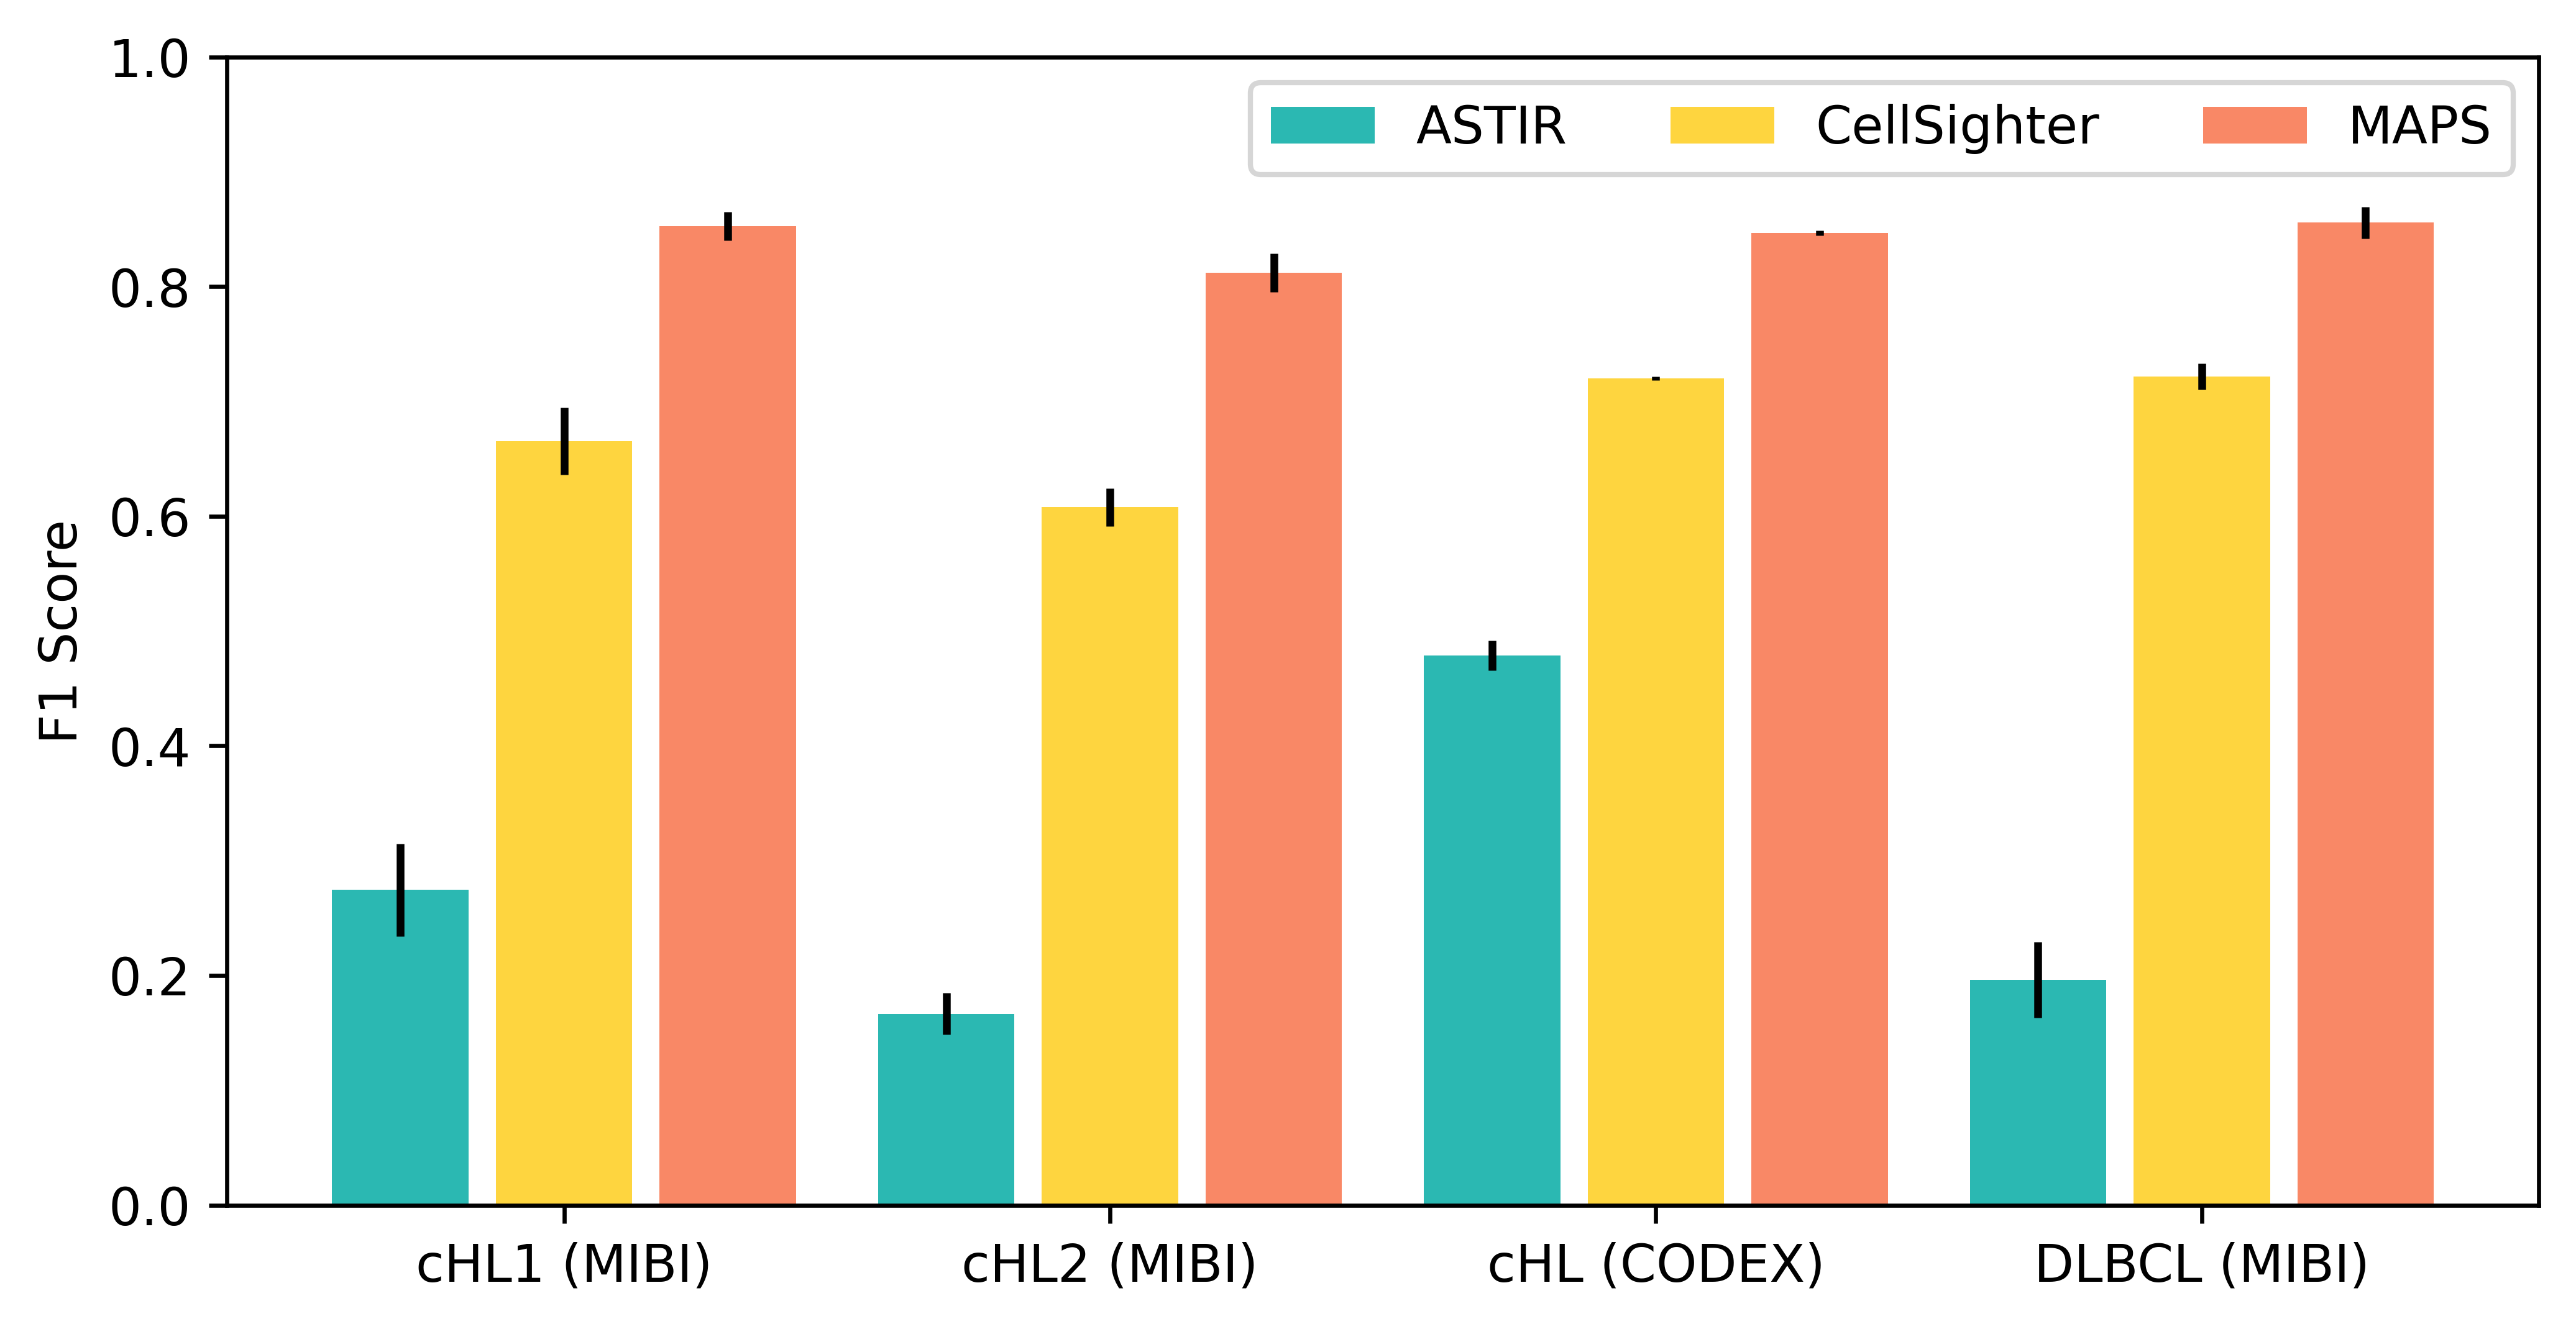

In [21]:
astir_nolan = np.load('~/ASTIR/results/cHL2_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
cellsighter_nolan = np.load('~/CellSighter/results/cHL2_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
macs_nolan = np.load('~/MAPS/cHL2_MIBI/results/train_valid_test/cell_level_performance_plot.npy', allow_pickle=True).item()

astir_ebv = np.load('~/ASTIR/results/cHL1_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
cellsighter_ebv = np.load('~/CellSighter/results/cHL1_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
macs_ebv = np.load('~/MAPS/cHL1_MIBI/results/train_valid_test/cell_level_performance_plot.npy', allow_pickle=True).item()

astir_codex = np.load('~/ASTIR/results/cHL_CODEX/cell_level_performance_plot.npy', allow_pickle=True).item()
cellsighter_codex = np.load('~/CellSighter/results/cHL_CODEX/cell_level_performance_plot.npy', allow_pickle=True).item()
macs_codex = np.load('~/MAPS/cHL_CODEX/results/train_valid_test/cell_level_performance_plot.npy', allow_pickle=True).item()

astir_dlbc = np.load('~/ASTIR/results/DLBC_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
cellsighter_dlbc = np.load('~/CellSighter/results/DLBC_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
macs_dlbc = np.load('~/MAPS/DLBC_MIBI/results/train_valid_test/cell_level_performance_plot.npy', allow_pickle=True).item()


result_dir = '~/Results/All_Datasets'
os.makedirs(result_dir, exist_ok=True)

dataset_names = ['cHL1 (MIBI)', 'cHL2 (MIBI)', 'cHL (CODEX)', 'DLBCL (MIBI)']
means = np.zeros((len(dataset_names), 3))
stds = np.zeros((len(dataset_names), 3))

means[:,0] = np.array([astir_ebv['means'][-1,2], astir_nolan['means'][-1,2], astir_codex['means'][-1,2], astir_dlbc['means'][-1,2]])
stds[:,0] = np.array([astir_ebv['stds'][-1,2], astir_nolan['stds'][-1,2], astir_codex['stds'][-1,2], astir_dlbc['stds'][-1,2]])

means[:,1] = np.array([cellsighter_ebv['means'][-1,2], cellsighter_nolan['means'][-1,2], cellsighter_codex['means'][-1,2], cellsighter_dlbc['means'][-1,2]])
stds[:,1] = np.array([cellsighter_ebv['stds'][-1,2], cellsighter_nolan['stds'][-1,2], cellsighter_codex['stds'][-1,2], cellsighter_dlbc['stds'][-1,2]])

means[:,2] = np.array([macs_ebv['means'][-1,2], macs_nolan['means'][-1,2], macs_codex['means'][-1,2], macs_dlbc['means'][-1,2]])
stds[:,2] = np.array([macs_ebv['stds'][-1,2], macs_nolan['stds'][-1,2], macs_codex['stds'][-1,2], macs_dlbc['stds'][-1,2]])

FILE_FORMAT='SVG'
FILE_EXT = FILE_FORMAT.lower()

color_palette =['#bed8d9', '#2bb8b2', '#fed53f', '#f98866', '#fe0000']
group_name = ['ASTIR', 'CellSighter', 'MAPS']

fig = plt.figure(figsize=(8, 4), dpi=600)
ax = fig.add_subplot(1,1,1)
x = np.arange(len(dataset_names))

offset = [-0.30, 0, 0.30]
width = 0.25

for n in range(len(group_name)):
    ax.bar(x + offset[n], means[:,n].tolist(), width, yerr=stds[:,n].tolist(), label=group_name[n], color=color_palette[n+1])
ax.set_ylabel('F1 Score')
ax.set_ylim([0.0, 1.0])
ax.set_yticks([0.0, 0.20, 0.40, 0.60, 0.80, 1.0])
ax.set_xticks(x, dataset_names)
ax.legend(loc='upper right', ncol=3)

fig.savefig(os.path.join(result_dir, 'cell_level_performance_plot.%s' % FILE_EXT), format=FILE_FORMAT, bbox_inches='tight')

## cHL1_MIBI

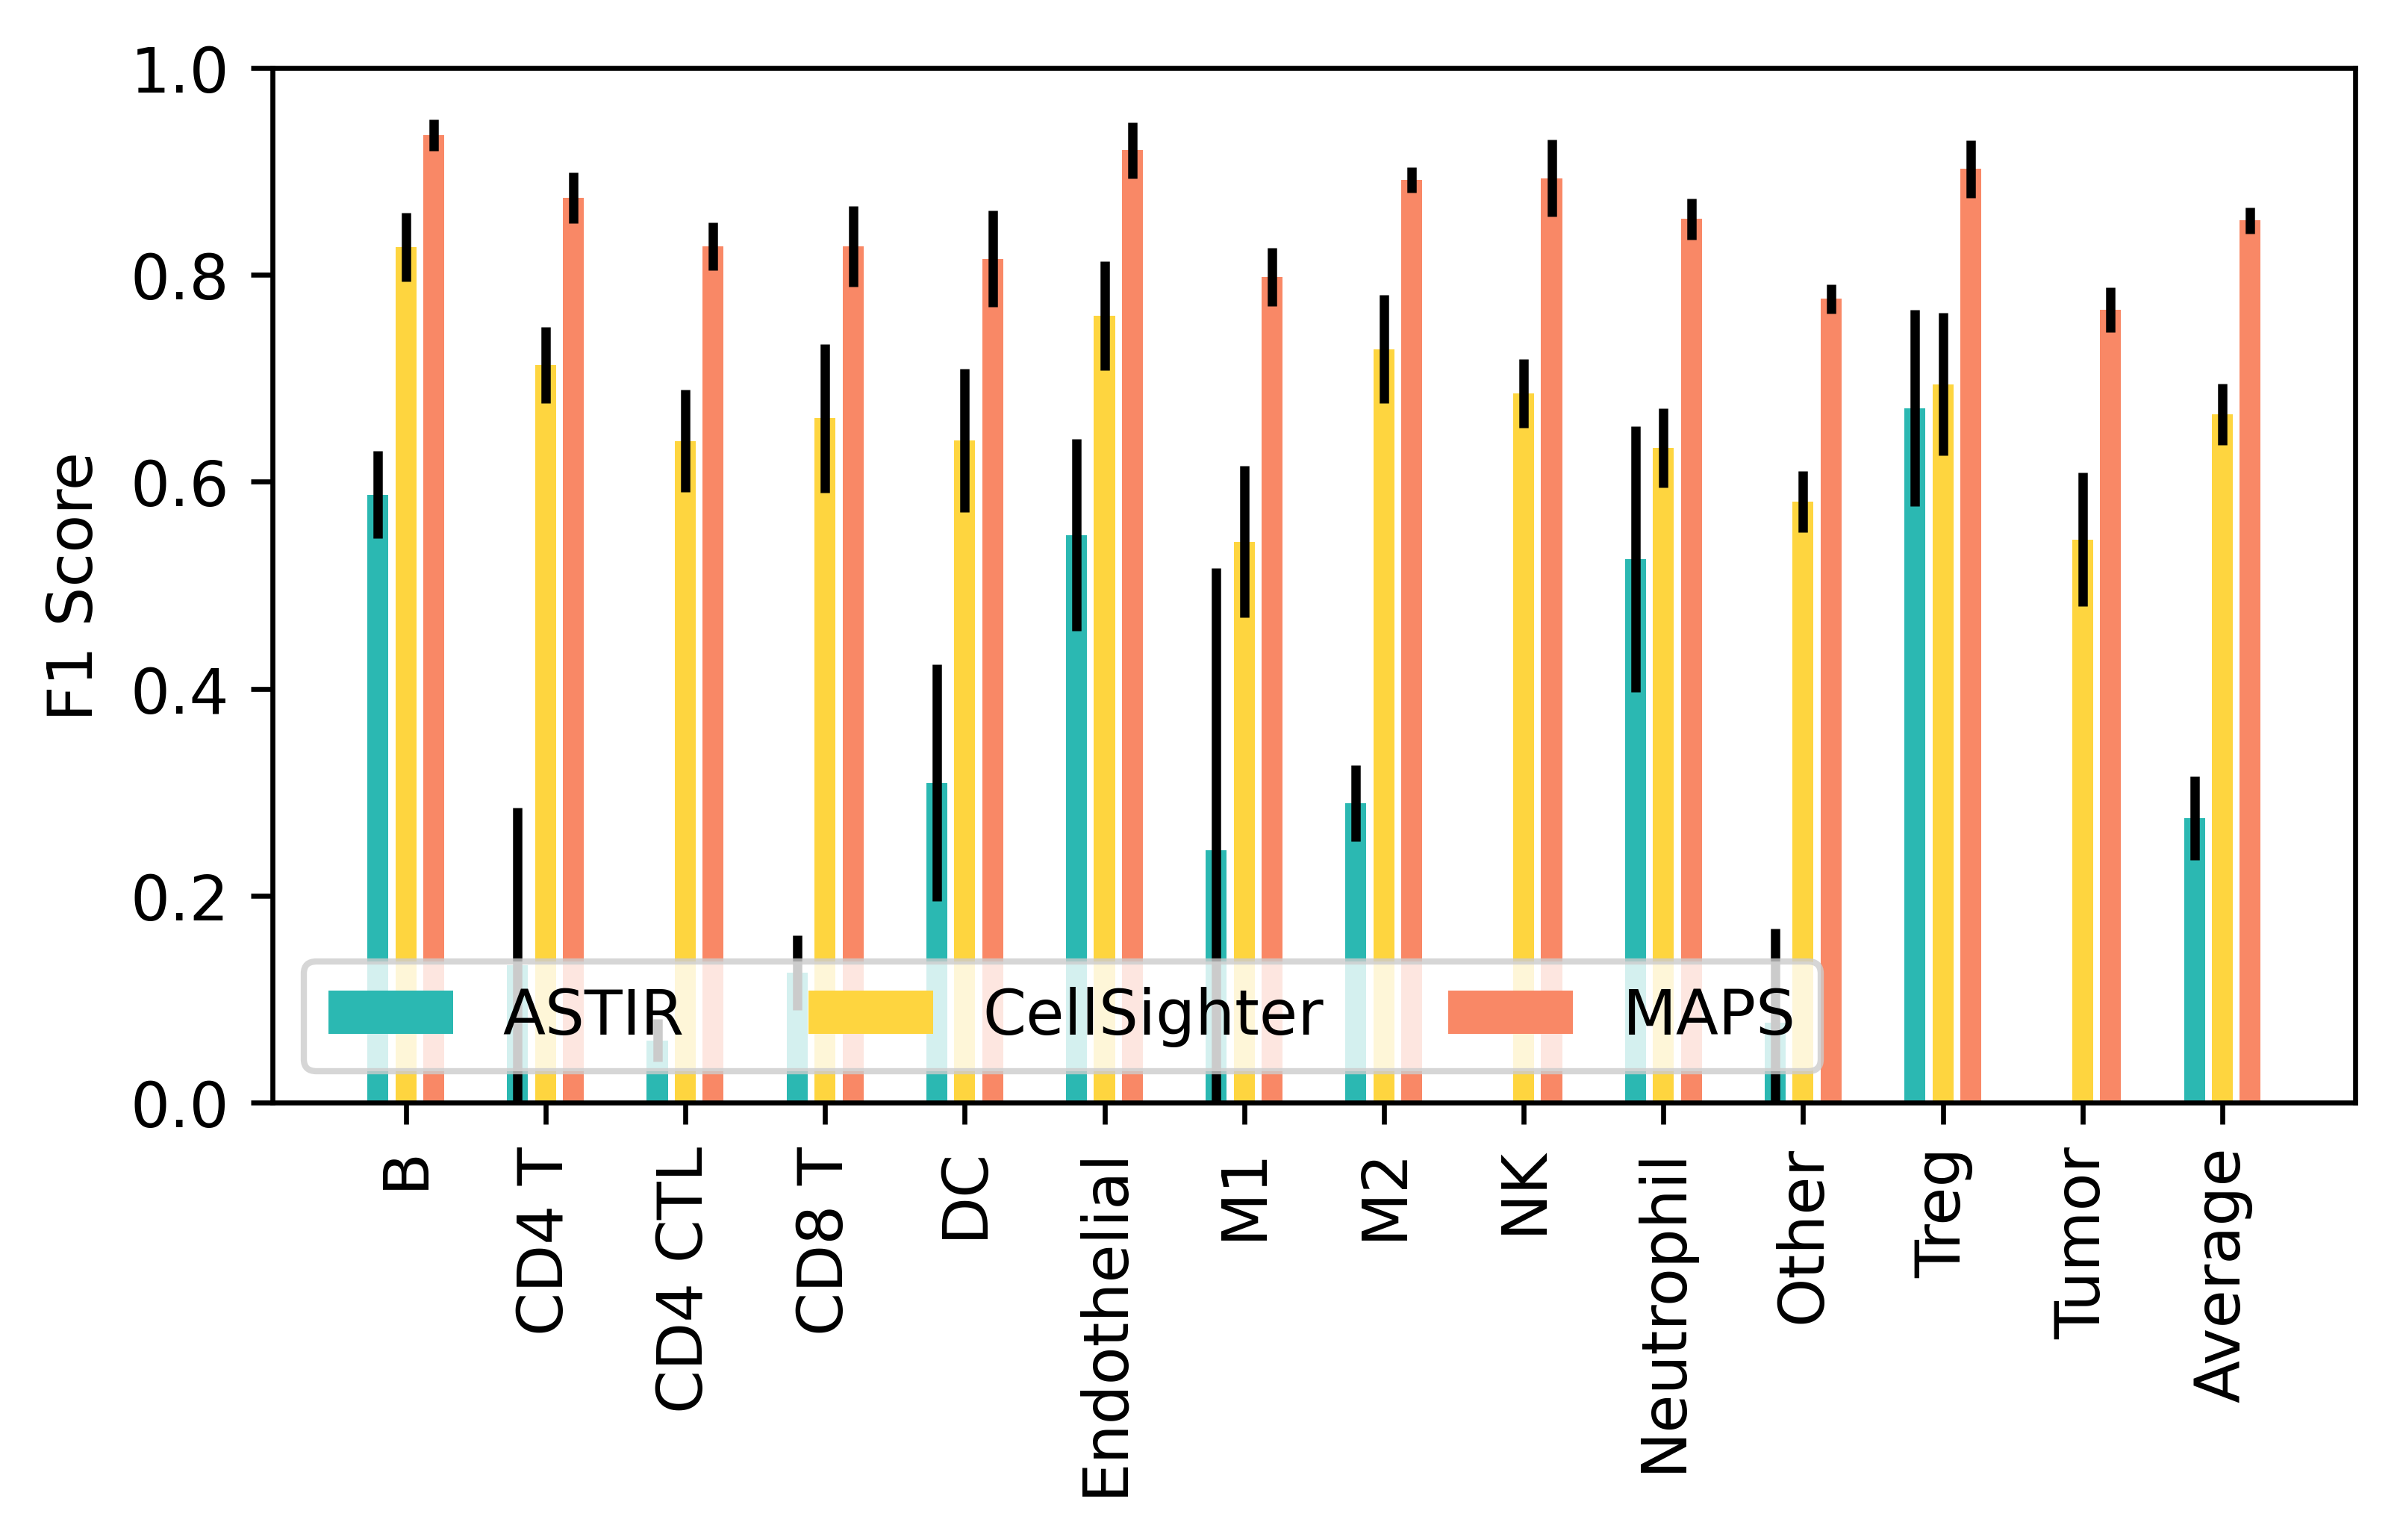

In [8]:
astir_results = np.load('~/ASTIR/results/cHL1_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
cellsighter_results = np.load('~/CellSighter/results/cHL1_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
macs_results = np.load('~/MAPS/cHL1_MIBI/results/train_valid_test/cell_level_performance_plot.npy', allow_pickle=True).item()

result_dir = '~/Results/cHL1_MIBI'
os.makedirs(result_dir, exist_ok=True)

class_names = macs_results['class_names']
means = np.zeros((len(class_names), 3))
stds = np.zeros((len(class_names), 3))

means[:,0] = astir_results['means'][:,2]
stds[:,0] = astir_results['stds'][:,2]

means[:,1] = cellsighter_results['means'][:,2]
stds[:,1] = cellsighter_results['stds'][:,2]

means[:,2] = macs_results['means'][:,2]
stds[:,2] = macs_results['stds'][:,2]

FILE_FORMAT='SVG'
FILE_EXT = FILE_FORMAT.lower()

color_palette =['#bed8d9', '#2bb8b2', '#fed53f', '#f98866', '#fe0000']
group_name = ['ASTIR', 'CellSighter', 'MAPS']

fig = plt.figure(figsize=(6, 3), dpi=600)
ax = fig.add_subplot(1,1,1)
x = np.arange(len(class_names))

offset = [-0.20, 0, 0.20]
width = 0.15

for n in range(len(group_name)):
    ax.bar(x + offset[n], means[:,n].tolist(), width, yerr=stds[:,n].tolist(), label=group_name[n], color=color_palette[n+1])
ax.set_ylabel('F1 Score')
ax.set_ylim([0.0, 1.0])
ax.set_yticks([0.0, 0.20, 0.40, 0.60, 0.80, 1.0])
ax.set_xticks(x, class_names, rotation=90)
ax.legend(loc='lower left', ncol=3)

fig.savefig(os.path.join(result_dir, 'cell_level_performance_plot.%s' % FILE_EXT), format=FILE_FORMAT, bbox_inches='tight')

## cHL2_MIBI

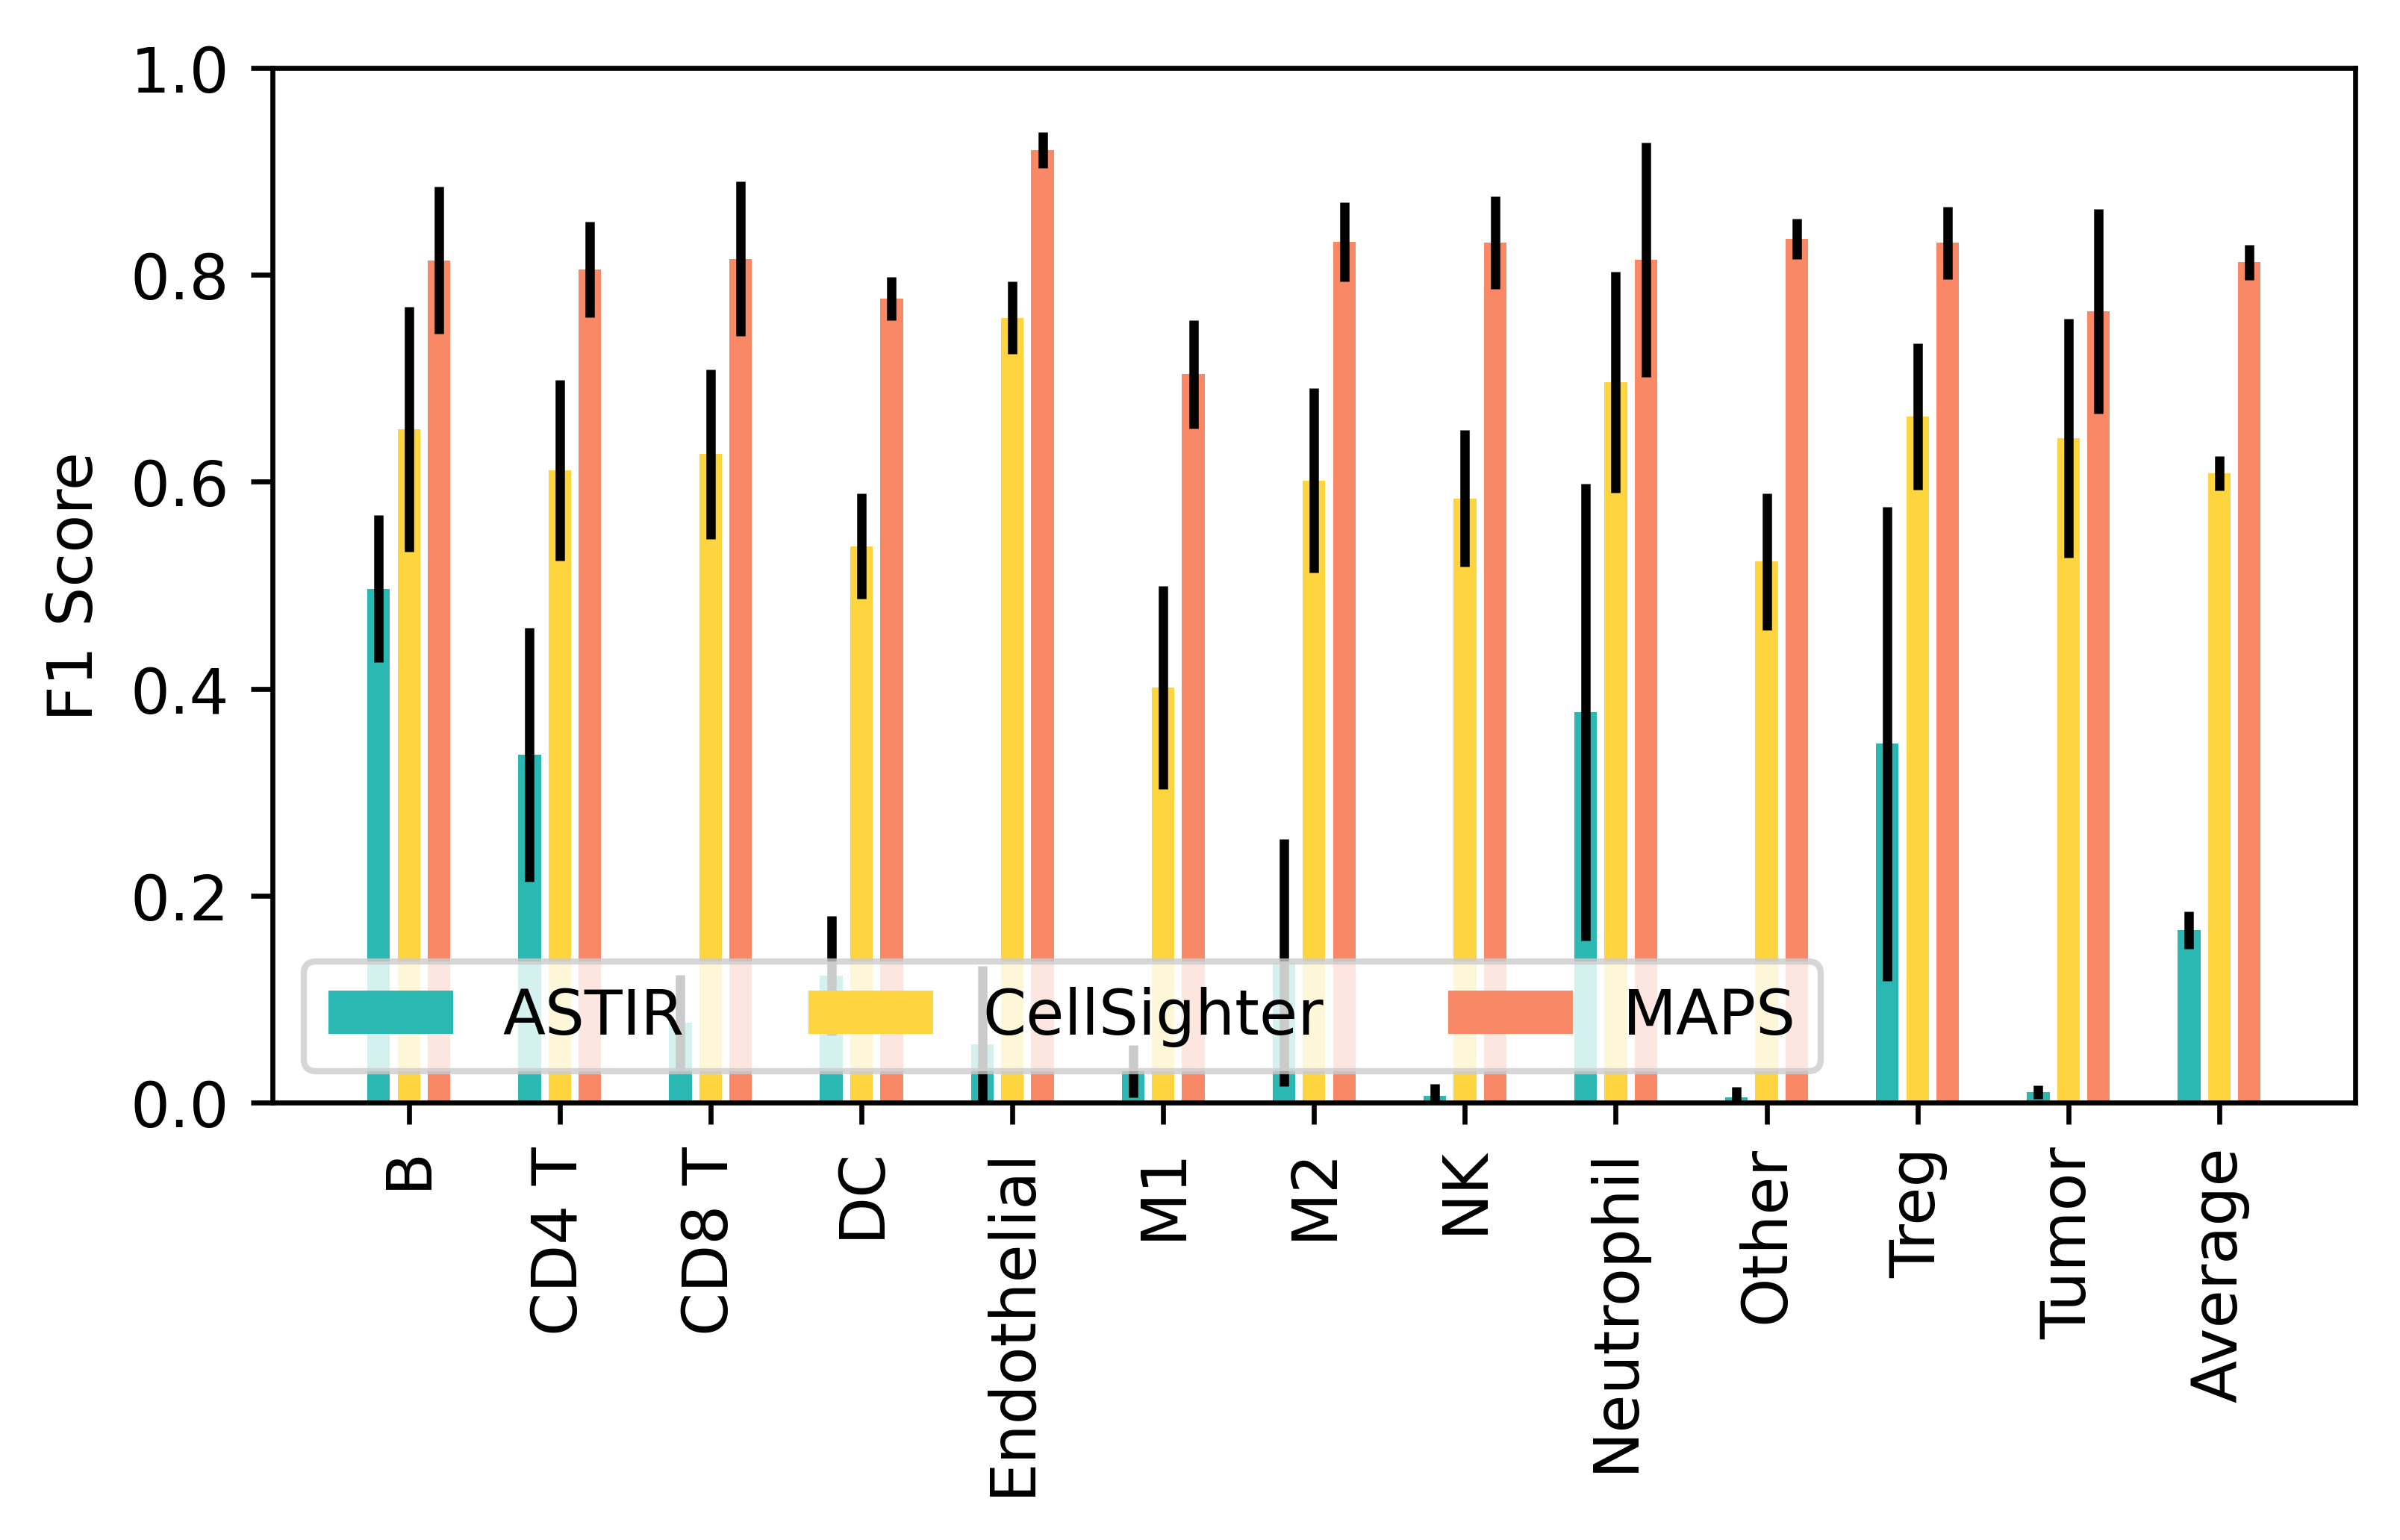

In [9]:
astir_results = np.load('~/ASTIR/results/cHL2_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
cellsighter_results = np.load('~/CellSighter/results/cHL2_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
macs_results = np.load('~/MAPS/cHL2_MIBI/results/train_valid_test/cell_level_performance_plot.npy', allow_pickle=True).item()

result_dir = '~/Results/cHL2_MIBI'
os.makedirs(result_dir, exist_ok=True)

class_names = macs_results['class_names']
means = np.zeros((len(class_names), 3))
stds = np.zeros((len(class_names), 3))

means[:,0] = astir_results['means'][:,2]
stds[:,0] = astir_results['stds'][:,2]

means[:,1] = cellsighter_results['means'][:,2]
stds[:,1] = cellsighter_results['stds'][:,2]

means[:,2] = macs_results['means'][:,2]
stds[:,2] = macs_results['stds'][:,2]

FILE_FORMAT='SVG'
FILE_EXT = FILE_FORMAT.lower()

color_palette =['#bed8d9', '#2bb8b2', '#fed53f', '#f98866', '#fe0000']
group_name = ['ASTIR', 'CellSighter', 'MAPS']

fig = plt.figure(figsize=(6, 3), dpi=600)
ax = fig.add_subplot(1,1,1)
x = np.arange(len(class_names))

offset = [-0.20, 0, 0.20]
width = 0.15

for n in range(len(group_name)):
    ax.bar(x + offset[n], means[:,n].tolist(), width, yerr=stds[:,n].tolist(), label=group_name[n], color=color_palette[n+1])
ax.set_ylabel('F1 Score')
ax.set_ylim([0.0, 1.0])
ax.set_yticks([0.0, 0.20, 0.40, 0.60, 0.80, 1.0])
ax.set_xticks(x, class_names, rotation=90)
ax.legend(loc='lower left', ncol=3)

fig.savefig(os.path.join(result_dir, 'cell_level_performance_plot.%s' % FILE_EXT), format=FILE_FORMAT, bbox_inches='tight')

## cHL_CODEX

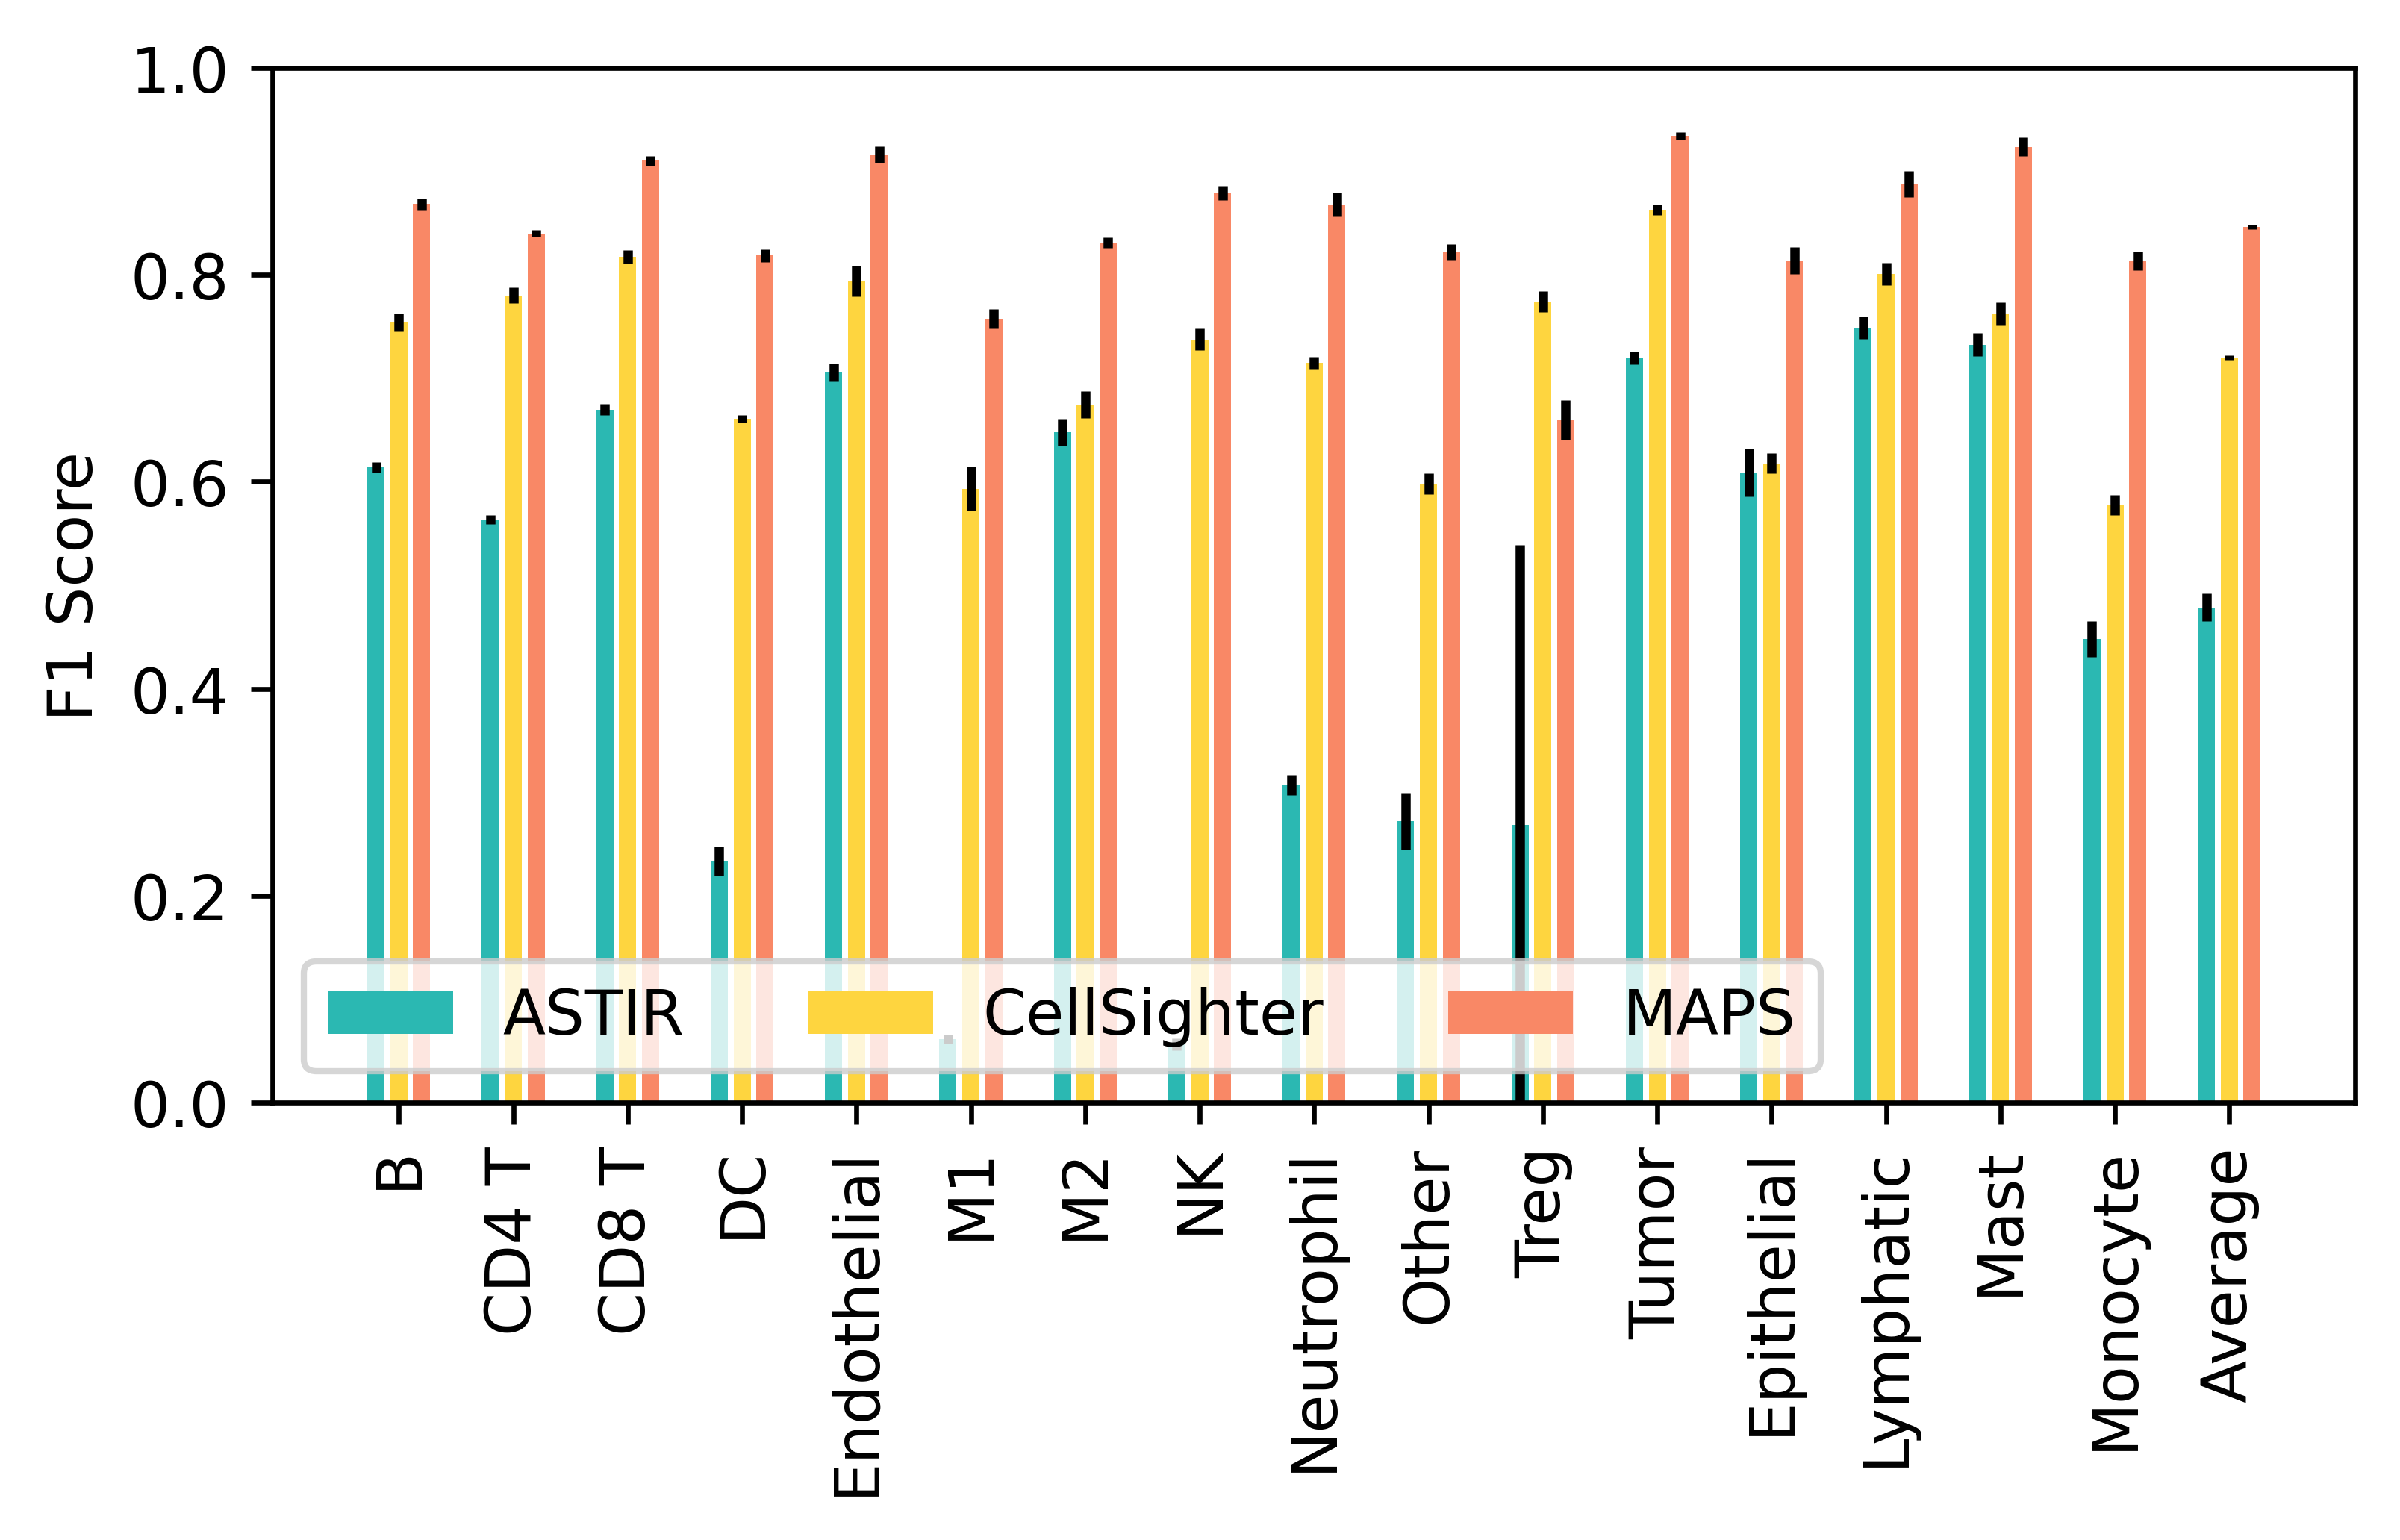

In [10]:
astir_results = np.load('~/ASTIR/results/cHL_CODEX/cell_level_performance_plot.npy', allow_pickle=True).item()
cellsighter_results = np.load('~/CellSighter/results/cHL_CODEX/cell_level_performance_plot.npy', allow_pickle=True).item()
macs_results = np.load('~/MAPS/cHL_CODEX/results/train_valid_test/cell_level_performance_plot.npy', allow_pickle=True).item()

result_dir = '~/Results/cHL_CODEX'
os.makedirs(result_dir, exist_ok=True)

class_names = macs_results['class_names']
means = np.zeros((len(class_names), 3))
stds = np.zeros((len(class_names), 3))

means[:,0] = astir_results['means'][:,2]
stds[:,0] = astir_results['stds'][:,2]

means[:,1] = cellsighter_results['means'][:,2]
stds[:,1] = cellsighter_results['stds'][:,2]

means[:,2] = macs_results['means'][:,2]
stds[:,2] = macs_results['stds'][:,2]

FILE_FORMAT='SVG'
FILE_EXT = FILE_FORMAT.lower()

color_palette =['#bed8d9', '#2bb8b2', '#fed53f', '#f98866', '#fe0000']
group_name = ['ASTIR', 'CellSighter', 'MAPS']

fig = plt.figure(figsize=(6, 3), dpi=600)
ax = fig.add_subplot(1,1,1)
x = np.arange(len(class_names))

offset = [-0.20, 0, 0.20]
width = 0.15

for n in range(len(group_name)):
    ax.bar(x + offset[n], means[:,n].tolist(), width, yerr=stds[:,n].tolist(), label=group_name[n], color=color_palette[n+1])
ax.set_ylabel('F1 Score')
ax.set_ylim([0.0, 1.0])
ax.set_yticks([0.0, 0.20, 0.40, 0.60, 0.80, 1.0])
ax.set_xticks(x, class_names, rotation=90)
ax.legend(loc='lower left', ncol=3)

fig.savefig(os.path.join(result_dir, 'cell_level_performance_plot.%s' % FILE_EXT), format=FILE_FORMAT, bbox_inches='tight')

# DLBCL MIBI

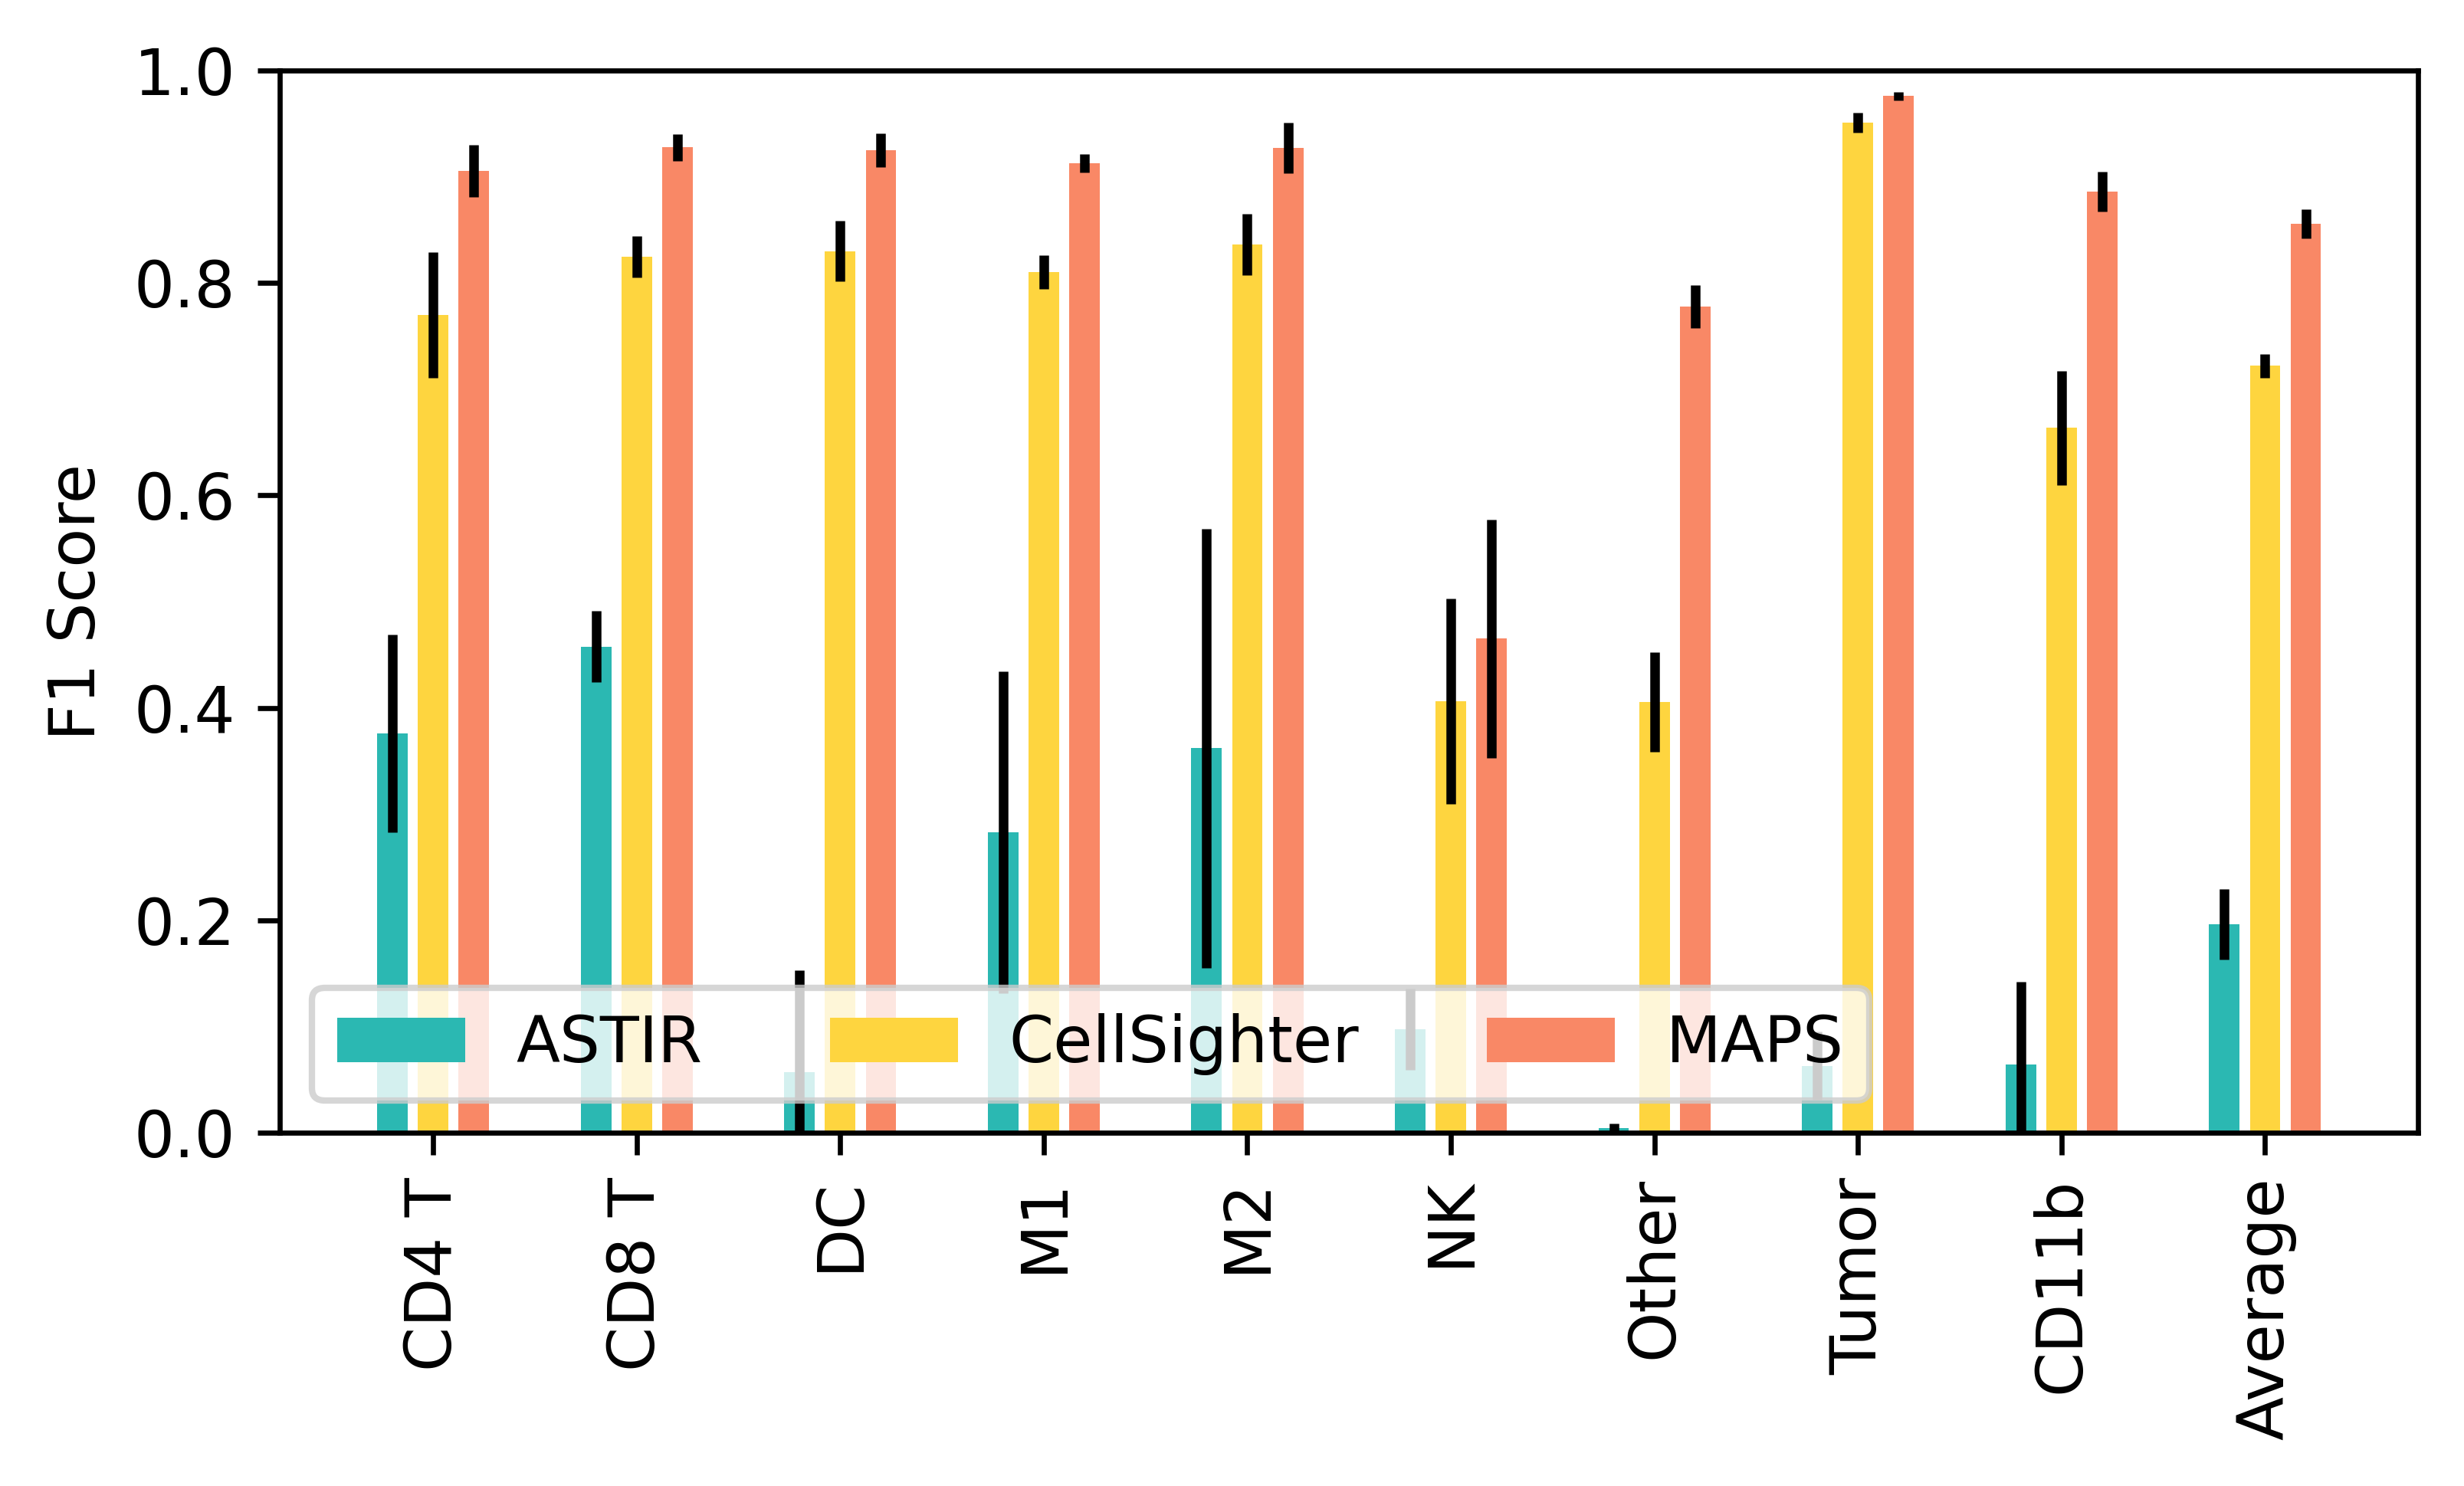

In [25]:
astir_results = np.load('~/ASTIR/results/DLBC_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
cellsighter_results = np.load('~/CellSighter/results/DLBC_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
macs_results = np.load('~/MAPS/DLBC_MIBI/results/train_valid_test/cell_level_performance_plot.npy', allow_pickle=True).item()

result_dir = '~/Results/DLBC_MIBI'
os.makedirs(result_dir, exist_ok=True)

class_names = macs_results['class_names']
means = np.zeros((len(class_names), 3))
stds = np.zeros((len(class_names), 3))

means[:,0] = astir_results['means'][:,2]
stds[:,0] = astir_results['stds'][:,2]

means[:,1] = cellsighter_results['means'][:,2]
stds[:,1] = cellsighter_results['stds'][:,2]

means[:,2] = macs_results['means'][:,2]
stds[:,2] = macs_results['stds'][:,2]

FILE_FORMAT='SVG'
FILE_EXT = FILE_FORMAT.lower()

color_palette =['#bed8d9', '#2bb8b2', '#fed53f', '#f98866', '#fe0000']
group_name = ['ASTIR', 'CellSighter', 'MAPS']

fig = plt.figure(figsize=(6, 3), dpi=600)
ax = fig.add_subplot(1,1,1)
x = np.arange(len(class_names))

offset = [-0.20, 0, 0.20]
width = 0.15

for n in range(len(group_name)):
    ax.bar(x + offset[n], means[:,n].tolist(), width, yerr=stds[:,n].tolist(), label=group_name[n], color=color_palette[n+1])
ax.set_ylabel('F1 Score')
ax.set_ylim([0.0, 1.0])
ax.set_yticks([0.0, 0.20, 0.40, 0.60, 0.80, 1.0])
ax.set_xticks(x, class_names, rotation=90)
ax.legend(loc='lower left', ncol=3)

fig.savefig(os.path.join(result_dir, 'cell_level_performance_plot.%s' % FILE_EXT), format=FILE_FORMAT, bbox_inches='tight')

## CRC Codex 

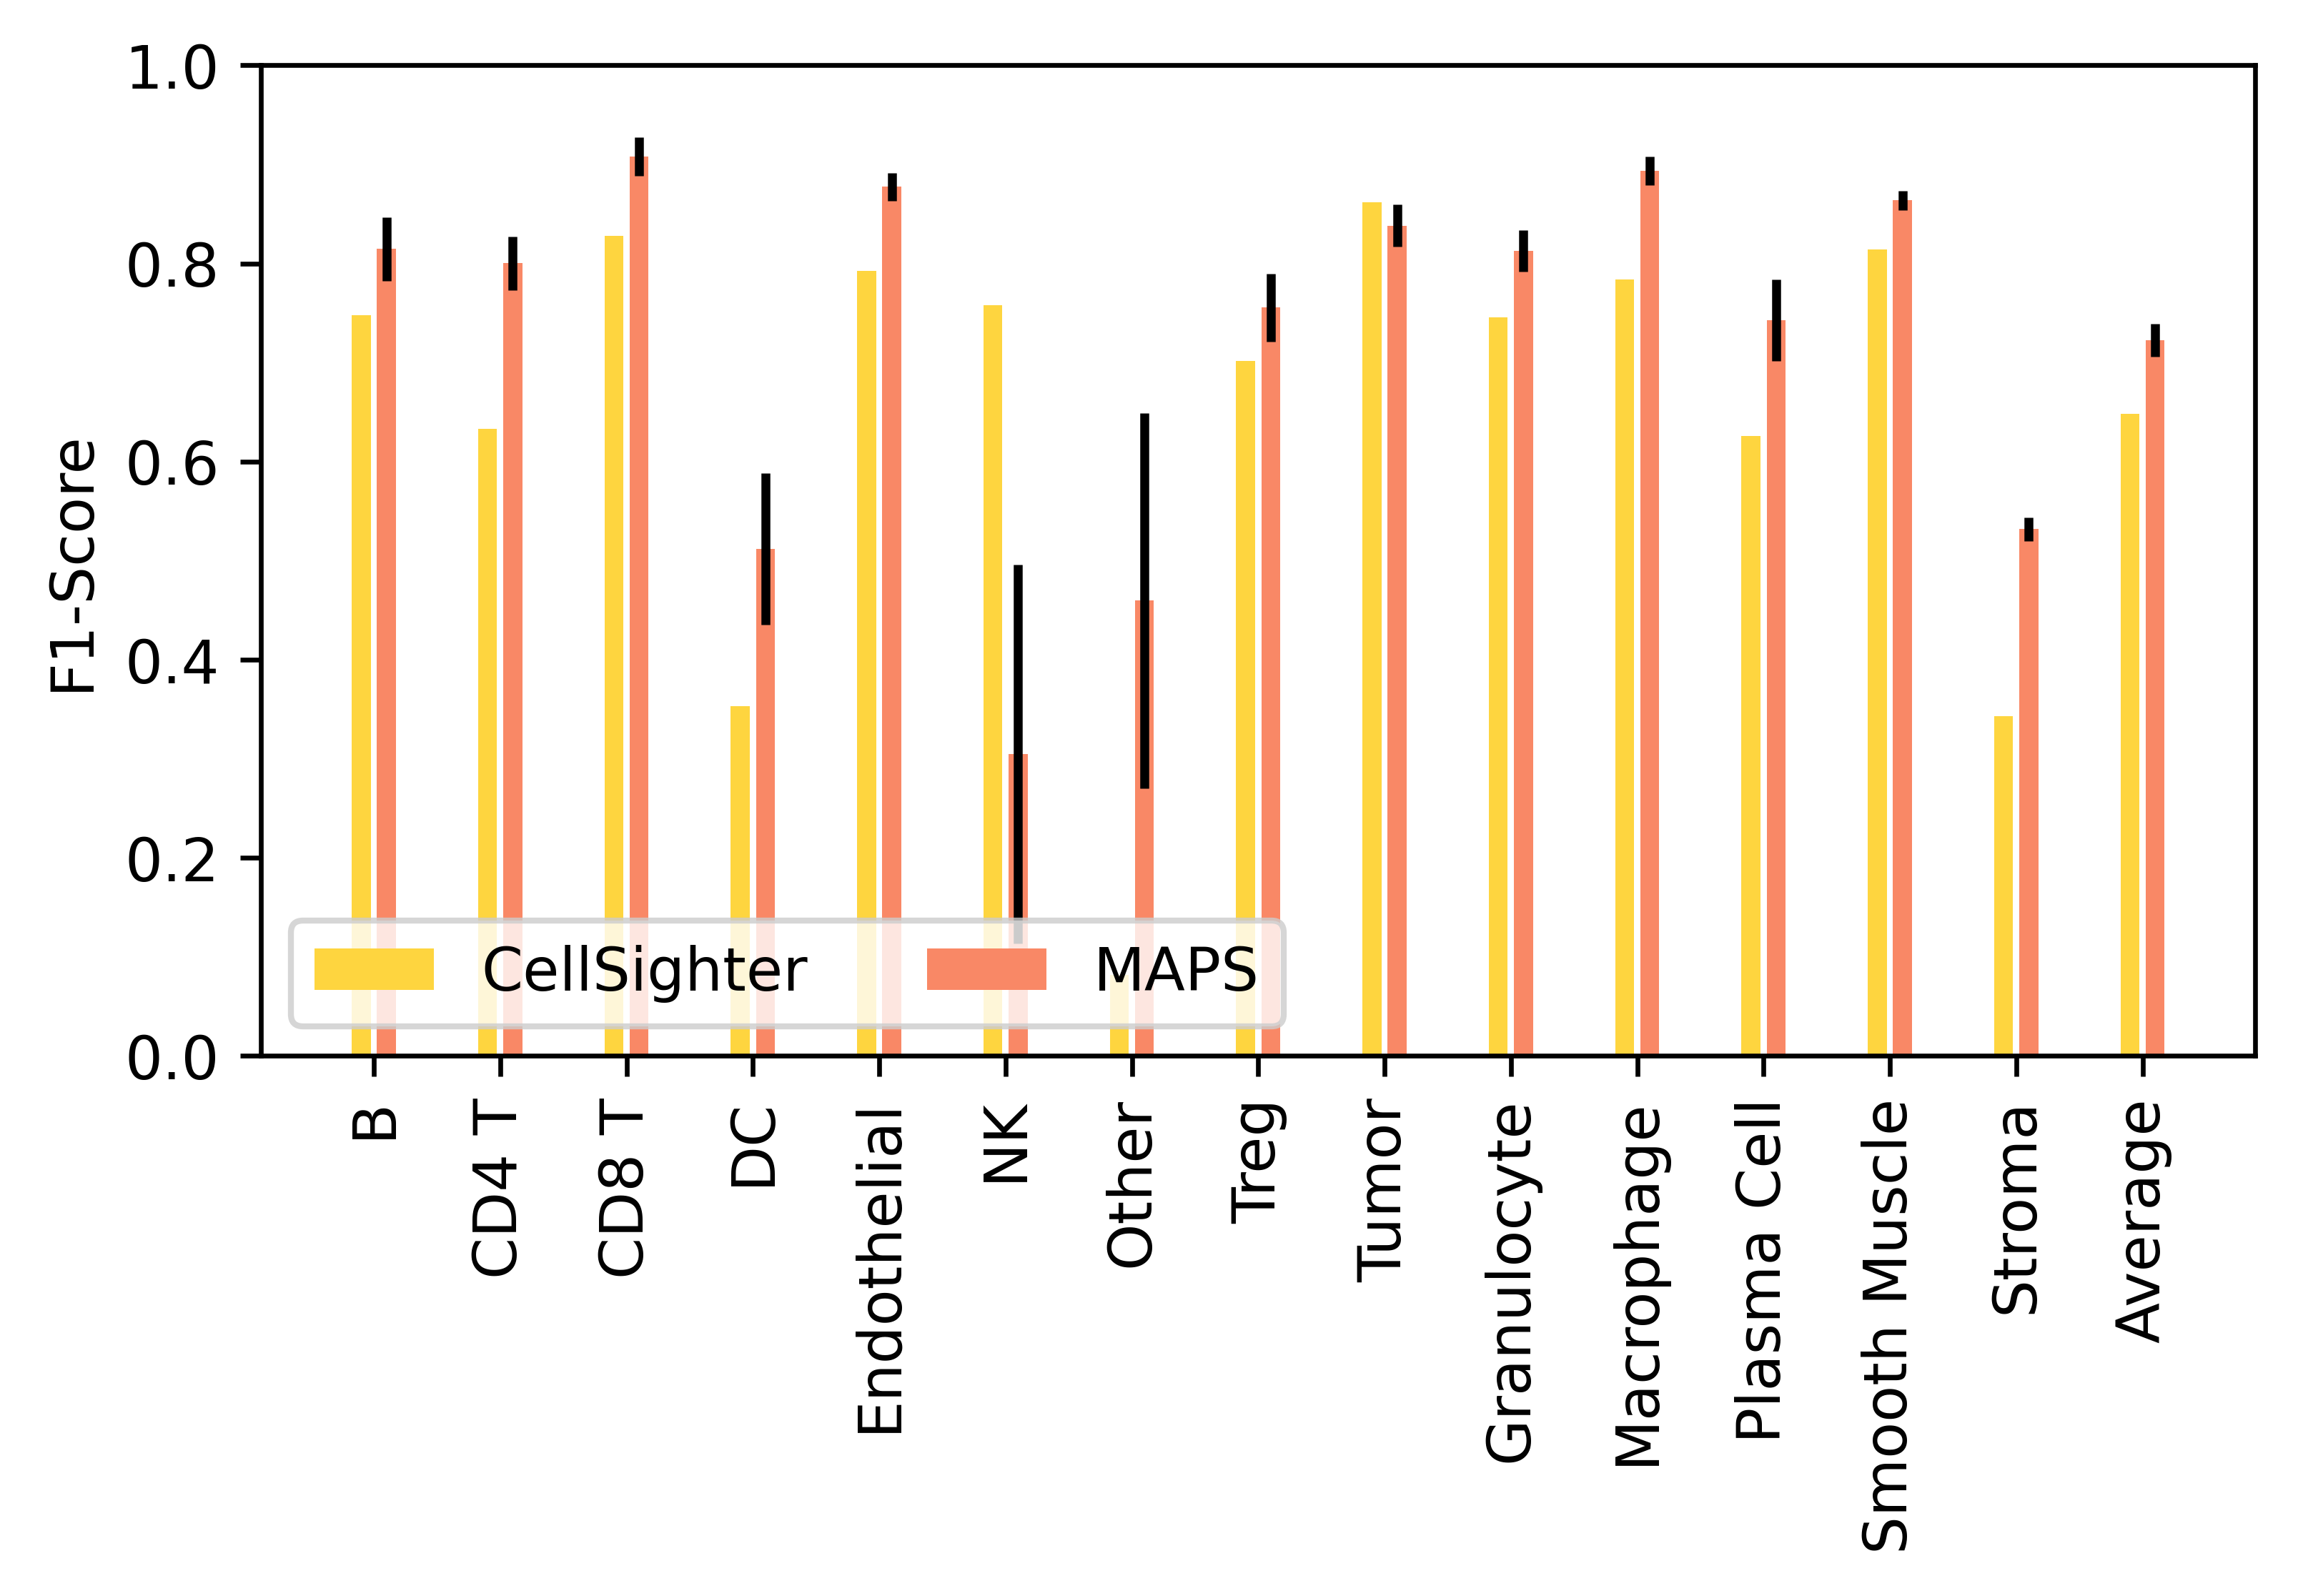

In [24]:
cellsighter_results = np.load('~/CellSighter/results/CRC_CODEX/cell_level_performance_plot.npy', allow_pickle=True).item()
macs_results = np.load('~/MAPS/CRC_CODEX/results/train_valid_test/cell_level_performance_plot.npy', allow_pickle=True).item()

result_dir = '~/Results/CRC Codex'
os.makedirs(result_dir, exist_ok=True)

class_names = macs_results['class_names']
means = np.zeros((len(class_names), 2))
stds = np.zeros((len(class_names), 2))

means[:,0] = cellsighter_results['means'][:,2]
stds[:,0] = cellsighter_results['stds'][:,2]

means[:,1] = macs_results['means'][:,2]
stds[:,1] = macs_results['stds'][:,2]

FILE_FORMAT='SVG'
FILE_EXT = FILE_FORMAT.lower()

color_palette =['#bed8d9', '#2bb8b2', '#fed53f', '#f98866', '#fe0000']
group_name = ['CellSighter', 'MAPS']

fig = plt.figure(figsize=(6, 3), dpi=600)
ax = fig.add_subplot(1,1,1)
x = np.arange(len(class_names))

offset = [-0.10, 0.10]
width = 0.15

for n in range(len(group_name)):
    ax.bar(x + offset[n], means[:,n].tolist(), width, yerr=stds[:,n].tolist(), label=group_name[n], color=color_palette[n+2])
ax.set_ylabel('F1-Score')
ax.set_ylim([0.0, 1.0])
ax.set_yticks([0.0, 0.20, 0.40, 0.60, 0.80, 1.0])
ax.set_xticks(x, class_names, rotation=90)
ax.legend(loc='lower left', ncol=3)

fig.savefig(os.path.join(result_dir, 'cell_level_performance_plot.%s' % FILE_EXT), format=FILE_FORMAT, bbox_inches='tight')

## cHL1_MIBI - Train Subsets - Class Level F1 Score Comparison

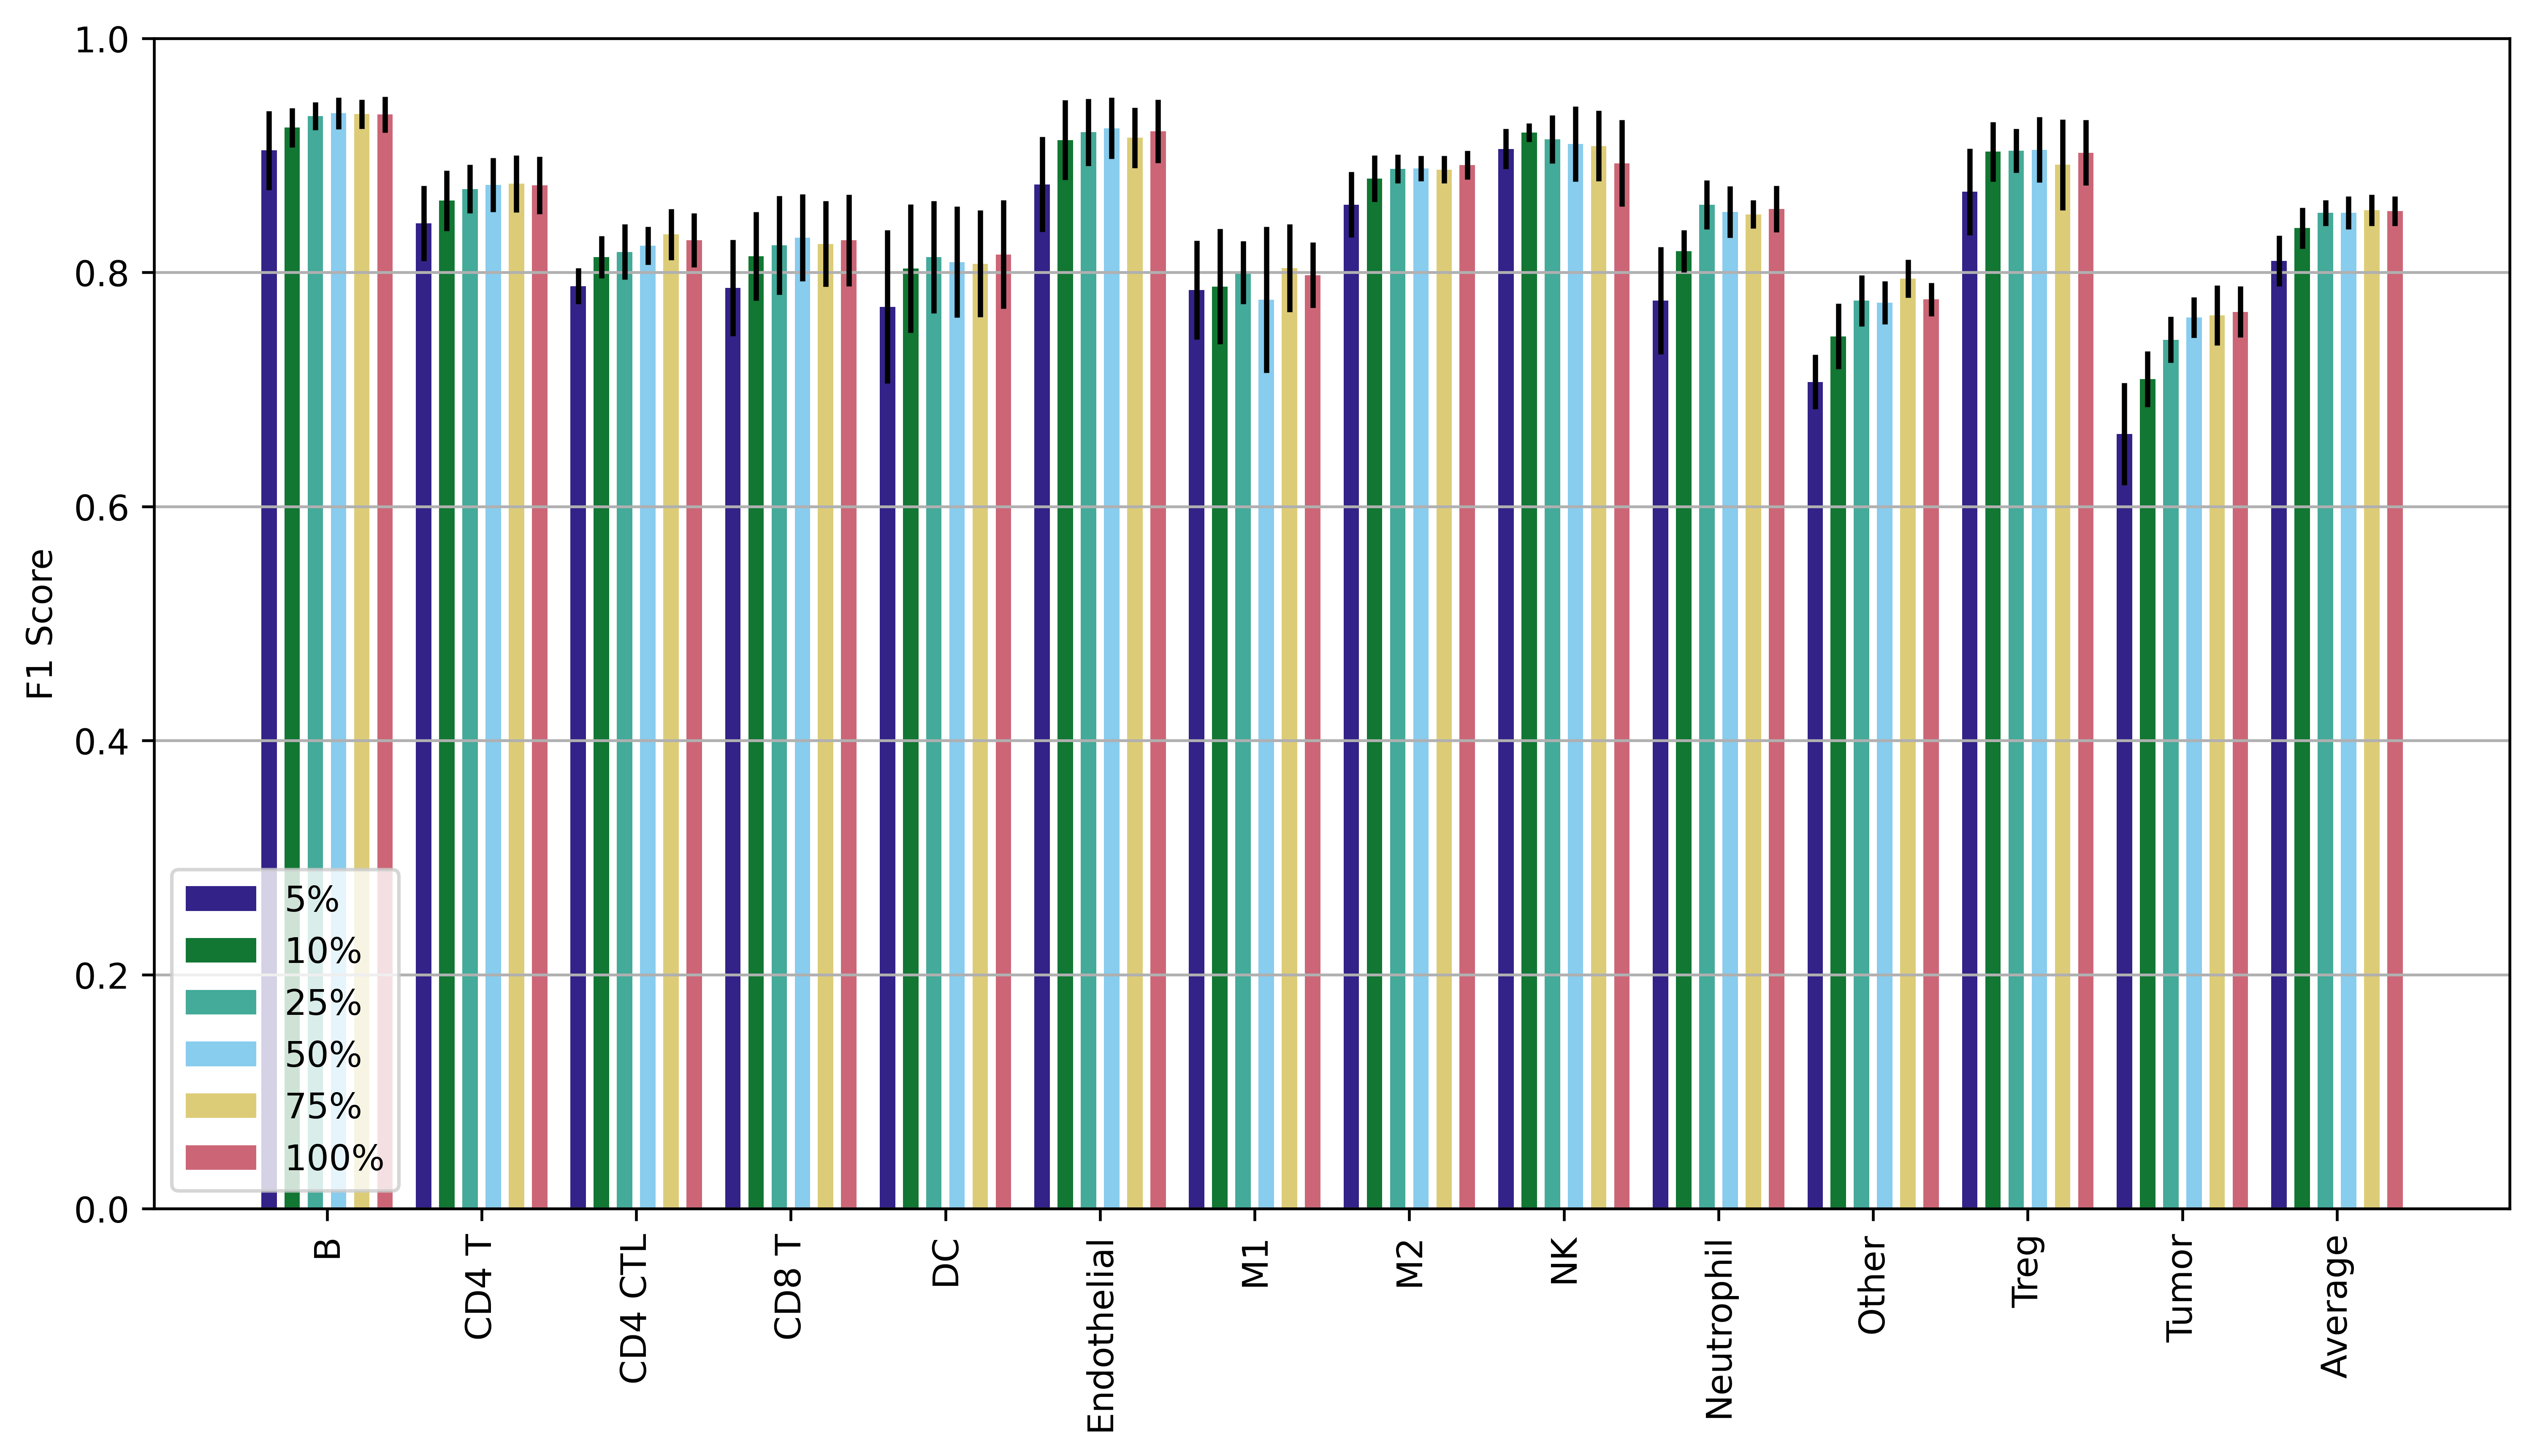

In [13]:
results = []
stats_dir = ''
for subset_percent in [5, 10, 25, 50, 75]:
    results.append(np.load('~/MAPS/cHL1_MIBI/results/train_valid_test_%02d/cell_level_performance_plot.npy' % subset_percent, allow_pickle=True).item())
results.append(np.load('~/MAPS/cHL1_MIBI/results/train_valid_test/cell_level_performance_plot.npy', allow_pickle=True).item())
result_dir = '~/Results/cHL1_MIBI_Train_Subsets/'
os.makedirs(result_dir, exist_ok=True)

class_names = results[0]['class_names']

means = np.zeros((len(class_names), len(results)))
stds = np.zeros((len(class_names), len(results)))

for i in range(len(results)):
    means[:,i] = results[i]['means'][:,2]
    stds[:,i] = results[i]['stds'][:,2]
    
FILE_FORMAT='SVG'
# FILE_FORMAT='PNG'
FILE_EXT = FILE_FORMAT.lower()

color_palette = ['#332288', '#117733', '#44AA99', '#88CCEE', '#DDCC77', '#CC6677', '#AA4499', '#882255', '#000000']
group_name = ['5%', '10%', '25%', '50%', '75%', '100%']

fig = plt.figure(figsize=(12, 6), dpi=600)
ax = fig.add_subplot(1,1,1)
x = np.arange(len(class_names))

offset = [-0.375, -0.225, -0.075, 0.075, 0.225, 0.375]
width = 0.10

for n in range(len(group_name)):
    ax.bar(x + offset[n], means[:,n].tolist(), width, yerr=stds[:,n].tolist(), label=group_name[n], color=color_palette[n])
ax.set_ylabel('F1 Score')
ax.set_ylim([0.0, 1.0])
ax.set_yticks([0.0, 0.20, 0.40, 0.60, 0.80, 1.0])
ax.set_xticks(x, class_names, rotation=90)
ax.legend(loc='lower left', ncol=1)
ax.grid(axis='y')

fig.savefig(os.path.join(result_dir, 'class_level_f1_score_comparison.%s' % FILE_EXT), format=FILE_FORMAT, bbox_inches='tight')

## cHL1_MIBI - Train Subsets - Average F1 Score Comparison

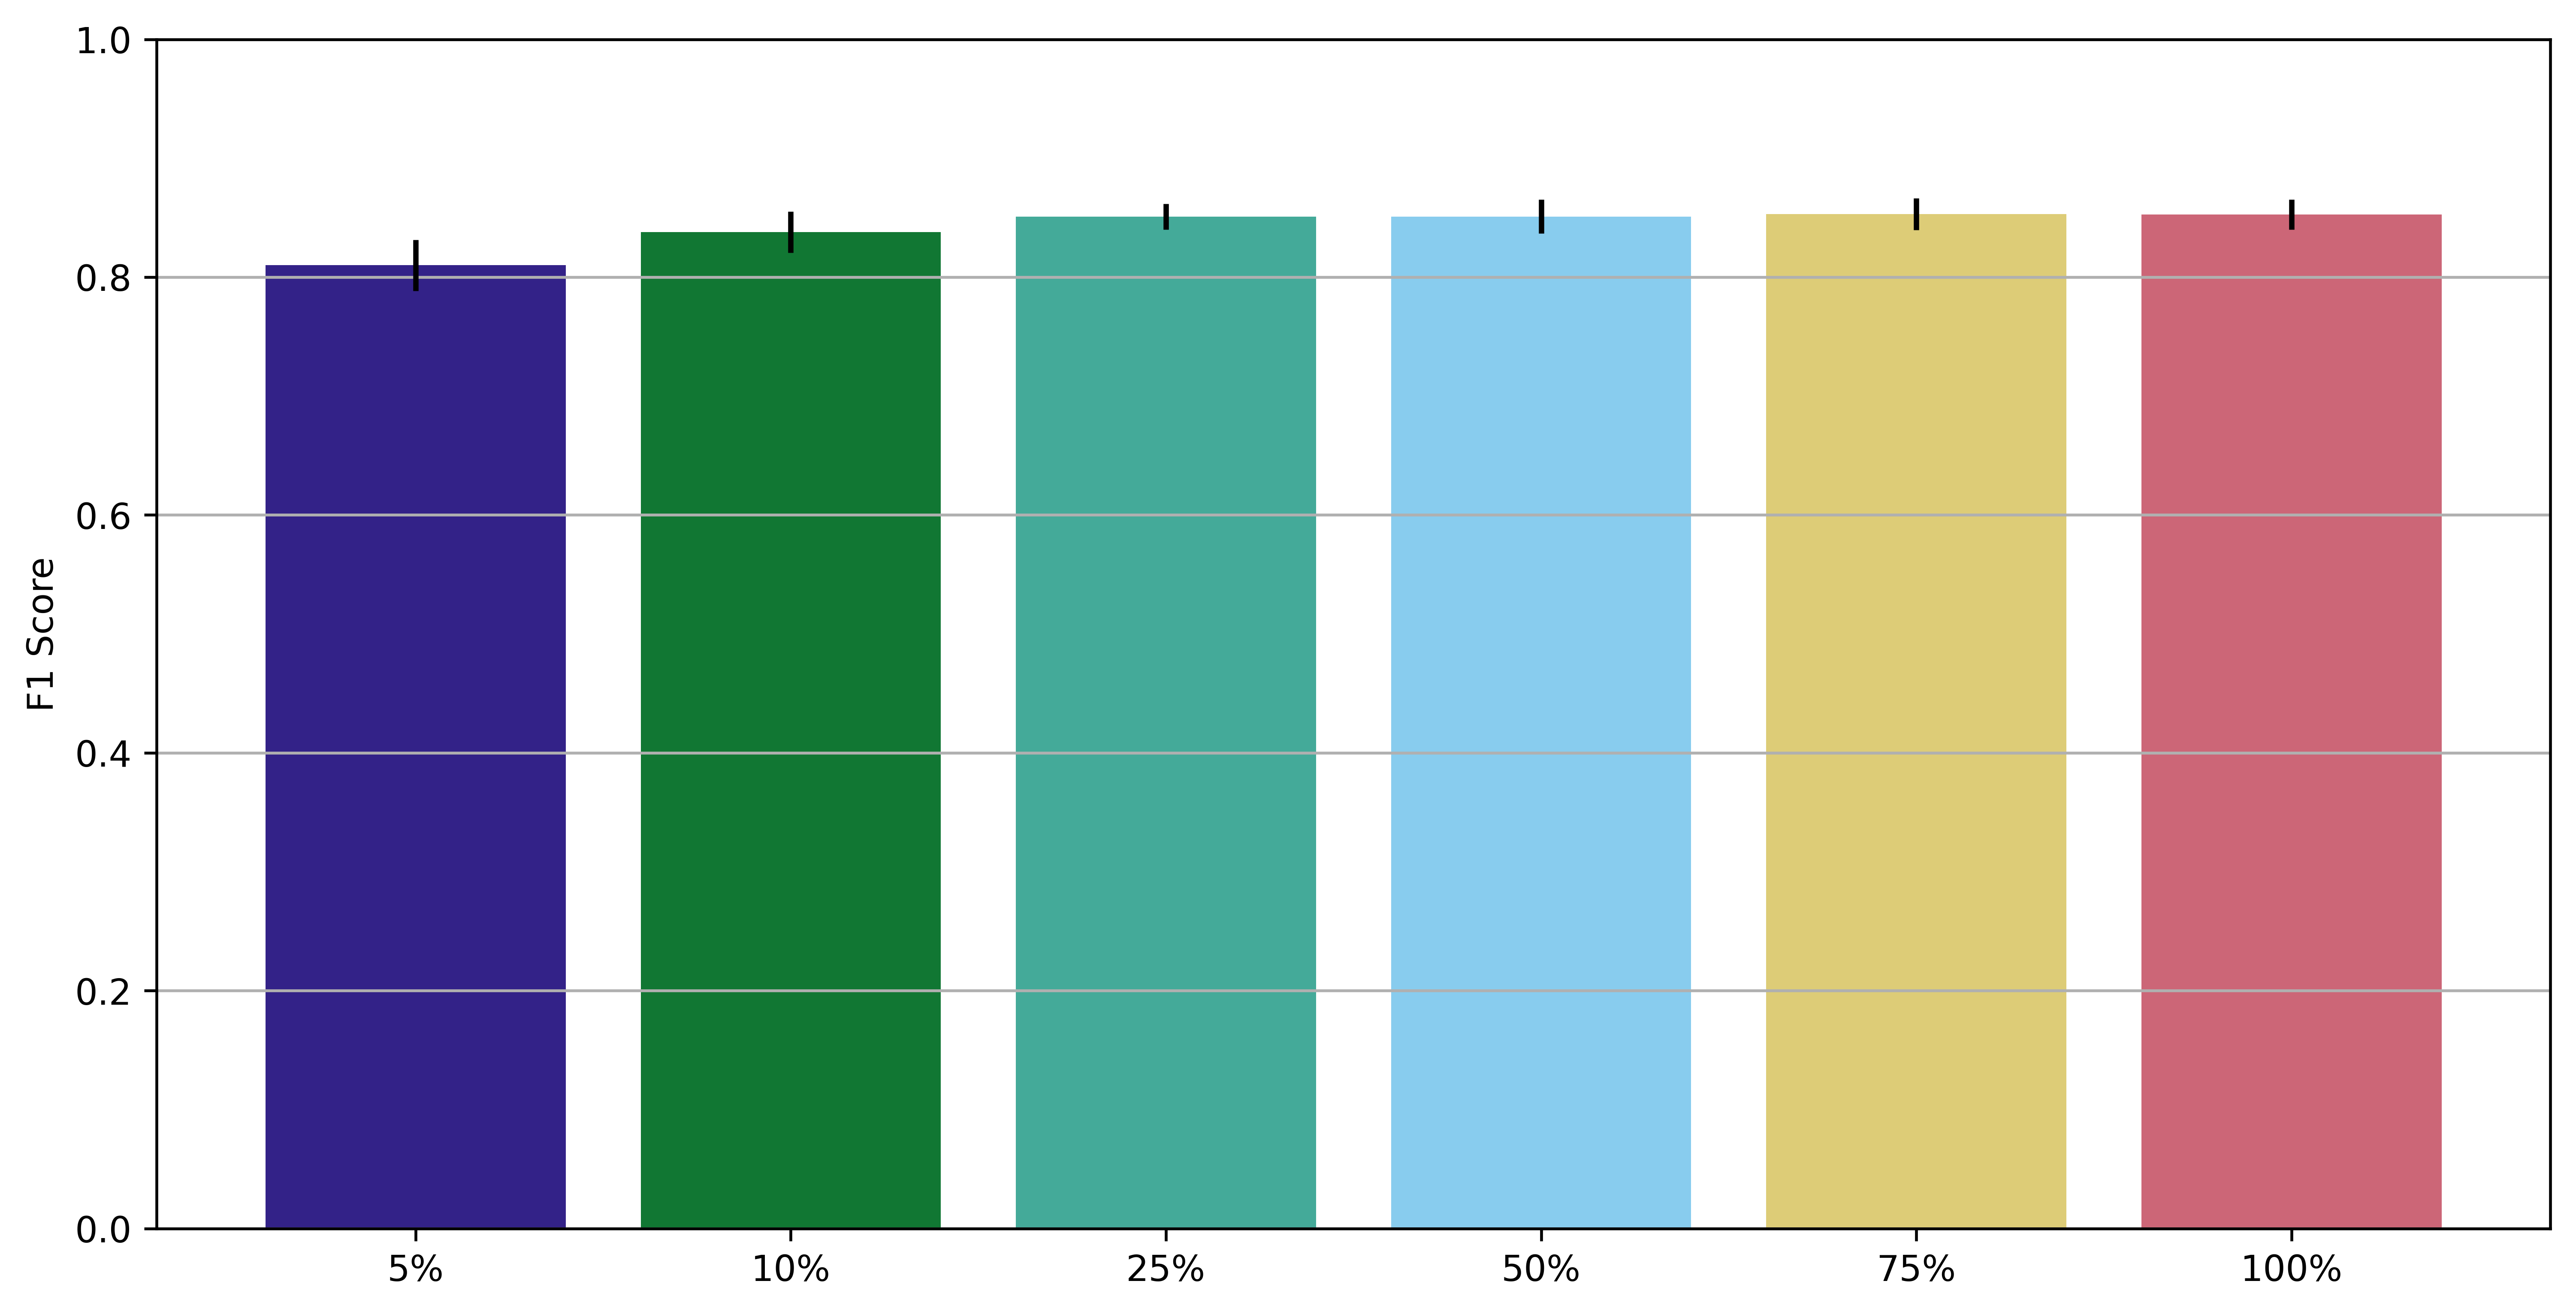

In [14]:
results = []
stats_dir = ''
for subset_percent in [5, 10, 25, 50, 75]:
    results.append(np.load('~/MAPS/cHL1_MIBI/results/train_valid_test_%02d/cell_level_performance_plot.npy' % subset_percent, allow_pickle=True).item())
results.append(np.load('~/MAPS/cHL1_MIBI/results/train_valid_test/cell_level_performance_plot.npy', allow_pickle=True).item())
result_dir = '~/Results/cHL1_MIBI_Train_Subsets/'
os.makedirs(result_dir, exist_ok=True)

class_names = results[0]['class_names']

means = np.zeros((len(results),))
stds = np.zeros((len(results),))

for i in range(len(results)):
    means[i] = results[i]['means'][-1,2]
    stds[i] = results[i]['stds'][-1,2]

FILE_FORMAT='SVG'
# FILE_FORMAT='PNG'
FILE_EXT = FILE_FORMAT.lower()

color_palette =['#332288', '#117733', '#44AA99', '#88CCEE', '#DDCC77', '#CC6677', '#AA4499', '#882255', '#000000']
group_name = ['5%', '10%', '25%', '50%', '75%', '100%']

fig = plt.figure(figsize=(12, 6), dpi=600)
ax = fig.add_subplot(1,1,1)

ax.bar(range(len(group_name)), means.tolist(), yerr=stds.tolist(), color=color_palette)
ax.set_ylabel('F1 Score')
ax.set_ylim([0.0, 1.0])
ax.set_yticks([0.0, 0.20, 0.40, 0.60, 0.80, 1.0])
ax.set_xticks(range(len(group_name)), group_name)
ax.grid(axis='y')

fig.savefig(os.path.join(result_dir, 'average_f1_score_comparison.%s' % FILE_EXT), format=FILE_FORMAT, bbox_inches='tight')

# Cross Dataset Evaluation - cHL1 MIBI to cHL2 MIBI

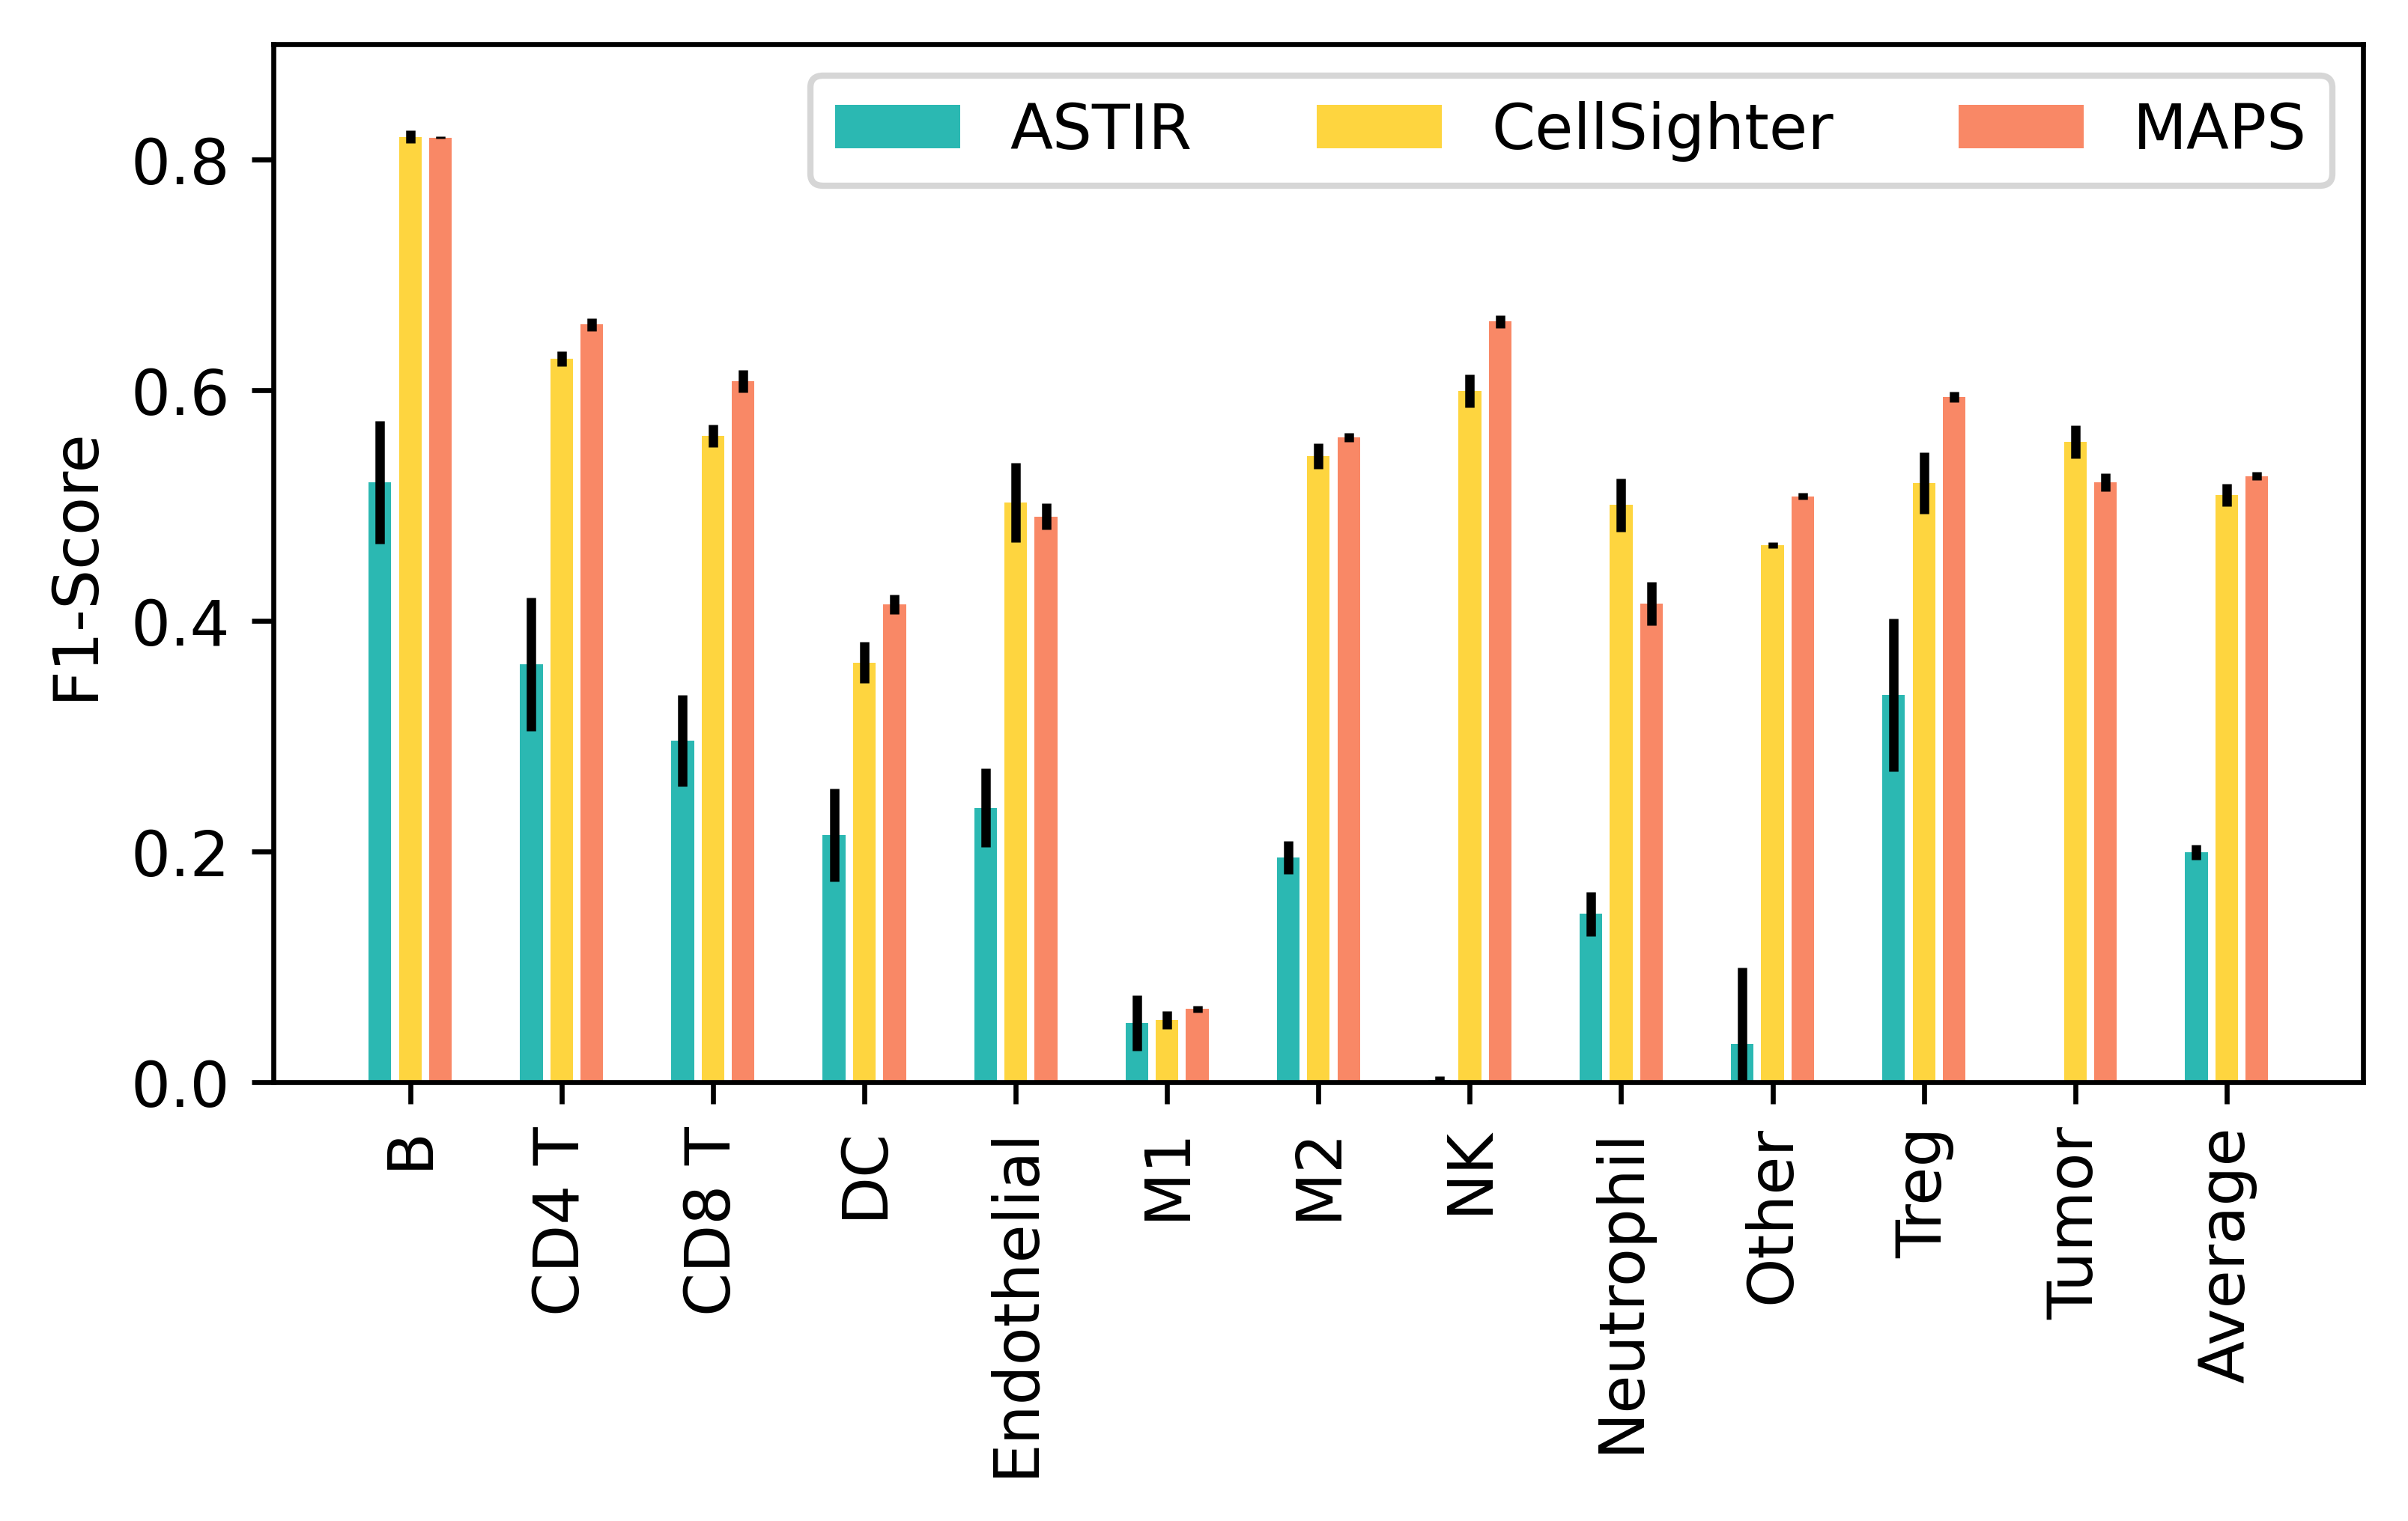

In [15]:
astir_results = np.load('~/ASTIR/results/cHL1_MIBI_cHL2_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
cellsighter_results = np.load('~/CellSighter/results/cHL1_MIBI_cHL2_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
macs_results = np.load('~/MAPS/cHL1_MIBI/results/cHL2_MIBI_test/cell_level_performance_plot.npy', allow_pickle=True).item()

result_dir = '~/Results/cHL1 MIBI to cHL2 MIBI/'
os.makedirs(result_dir, exist_ok=True)

class_names = macs_results['class_names']
means = np.zeros((len(class_names), 3))
stds = np.zeros((len(class_names), 3))

means[:,0] = astir_results['means'][:,2]
stds[:,0] = astir_results['stds'][:,2]

means[:,1] = cellsighter_results['means'][:,2]
stds[:,1] = cellsighter_results['stds'][:,2]

means[:,2] = macs_results['means'][:,2]
stds[:,2] = macs_results['stds'][:,2]

FILE_FORMAT='SVG'
FILE_EXT = FILE_FORMAT.lower()

color_palette =['#bed8d9', '#2bb8b2', '#fed53f', '#f98866', '#fe0000']
group_name = ['ASTIR', 'CellSighter', 'MAPS']

fig = plt.figure(figsize=(6, 3), dpi=600)
ax = fig.add_subplot(1,1,1)
x = np.arange(len(class_names))

offset = [-0.20, 0, 0.20]
width = 0.15

for n in range(len(group_name)):
    ax.bar(x + offset[n], means[:,n].tolist(), width, yerr=stds[:,n].tolist(), label=group_name[n], color=color_palette[n+1])
ax.set_ylabel('F1-Score')
ax.set_ylim([0.0, 0.90])
ax.set_yticks([0.0, 0.20, 0.40, 0.60, 0.80])
ax.set_xticks(x, class_names, rotation=90)
ax.legend(loc='upper right', ncol=3)

fig.savefig(os.path.join(result_dir, 'cell_level_performance_plot.%s' % FILE_EXT), format=FILE_FORMAT, bbox_inches='tight')

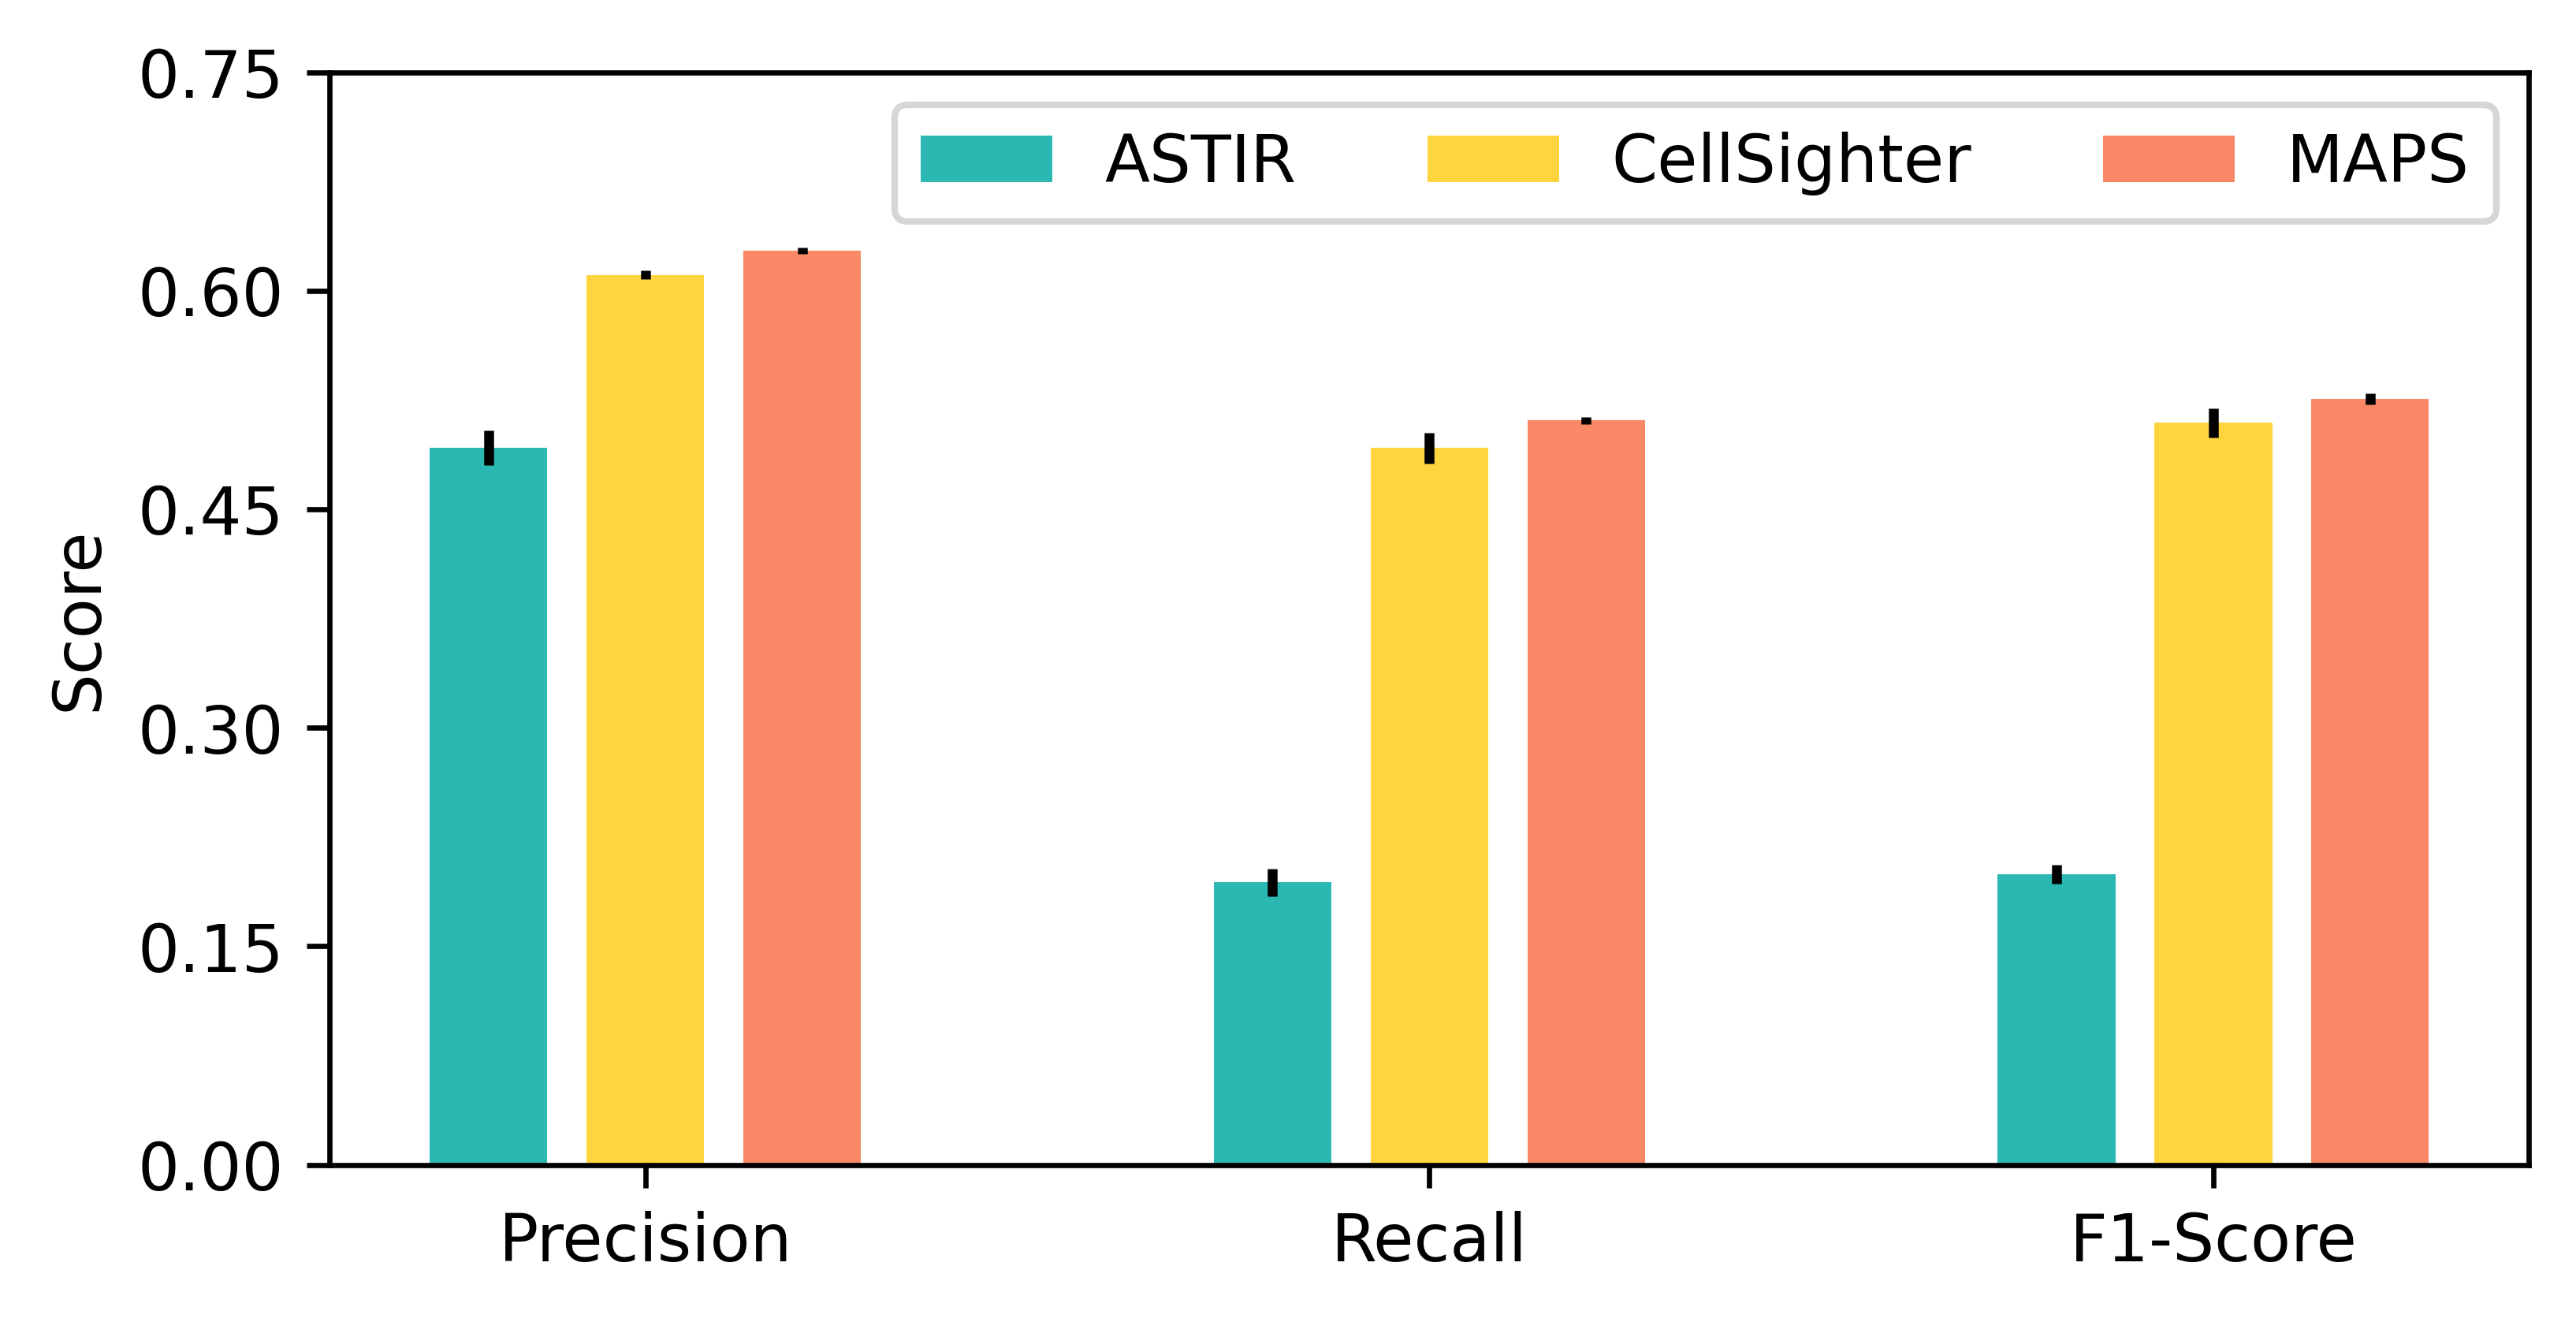

In [16]:
astir_results = np.load('~/ASTIR/results/cHL1_MIBI_cHL2_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
cellsighter_results = np.load('~/CellSighter/results/cHL1_MIBI_cHL2_MIBI/cell_level_performance_plot.npy', allow_pickle=True).item()
macs_results = np.load('~/MAPS/cHL1_MIBI/results/cHL2_MIBI_test/cell_level_performance_plot.npy', allow_pickle=True).item()

result_dir = '~/Results/cHL1 MIBI to cHL2 MIBI/'
os.makedirs(result_dir, exist_ok=True)

x_tick_labels = ['Precision', 'Recall', 'F1-Score']
means = np.zeros((3, 3))
stds = np.zeros((3, 3))

for i in range(3):
    means[i,0] = astir_results['means'][-1,i]
    stds[i,0] = astir_results['stds'][-1,i]

for i in range(3):
    means[i,1] = cellsighter_results['means'][-1,i]
    stds[i,1] = cellsighter_results['stds'][-1,i]
    
for i in range(3):
    means[i,2] = macs_results['means'][-1,i]
    stds[i,2] = macs_results['stds'][-1,i]

FILE_FORMAT='SVG'
FILE_EXT = FILE_FORMAT.lower()

color_palette =['#bed8d9', '#2bb8b2', '#fed53f', '#f98866', '#fe0000']
group_name = ['ASTIR', 'CellSighter', 'MAPS']

fig = plt.figure(figsize=(6, 3), dpi=600)
ax = fig.add_subplot(1,1,1)
x = np.arange(len(x_tick_labels))

offset = [-0.20, 0, 0.20]
width = 0.15

for n in range(len(group_name)):
    ax.bar(x + offset[n], means[:,n].tolist(), width, yerr=stds[:,n].tolist(), label=group_name[n], color=color_palette[n+1])
ax.set_ylabel('Score')
ax.set_ylim([0.0, 0.75])
ax.set_yticks([0.0, 0.15, 0.30, 0.45, 0.60, 0.75])
ax.set_xticks(x, x_tick_labels, rotation=0)
ax.legend(loc='upper right', ncol=3)

fig.savefig(os.path.join(result_dir, 'avg_cell_level_performance_plot.%s' % FILE_EXT), format=FILE_FORMAT, bbox_inches='tight')